In [15]:
import cv2
import numpy as np

# Load the image in grayscale mode
image = cv2.imread('/Users/henryschnieders/desktop/test_subject.png', cv2.IMREAD_GRAYSCALE)

# Define the intensity value to be changed
intensity_value_max = 160
intensity_value_min = 65  # Example intensity value

# Create a mask where the intensity is equal to the specified value
mask = (intensity_value_min <= image) & (image <= intensity_value_max)

# Change the intensity of the pixels that match the mask to white
image[mask] = 255

# Save the result
smoothed_image = cv2.bilateralFilter(image, 3, 75, 75)

# Save the result
cv2.imwrite('/Users/henryschnieders/desktop/filtered_image_bilateral.png', smoothed_image)

# Display the result
cv2.imshow('Filtered Image - Bilateral Filter', smoothed_image)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/Users/henryschnieders/Documents/ScriptedStyles/Designs/Logo/Scripted Styles/SS_Trebuchet MS copy 2.jpg')

# Get image dimensions
img_height, img_width, _ = image.shape

# Define text
text = "etsy.com/shop/ScriptedStylesArt"

# Define font parameters
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 4
font_thickness = 5
text_color = (0, 0, 0)  # Black text

# Get text size
(text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, font_thickness)

# Define text position (centered horizontaly at the bottom)
text_x = int((img_width - text_width) // 1.05) 
text_y = img_height - baseline - 60  # Padding from the bottom

# Put text on the image
cv2.putText(image, text, (text_x, text_y), font, font_scale, text_color, font_thickness, cv2.LINE_AA)

# Save the result
output_path = "/Users/henryschnieders/desktop/logo.png"
cv2.imwrite(output_path, image)
print(f"Output written to: {output_path}")

# Display the result (optional)
cv2.imshow("Image with Text", image)
cv2


Output written to: /Users/henryschnieders/desktop/logo.png


<module 'cv2' from '/opt/homebrew/lib/python3.12/site-packages/cv2/__init__.py'>

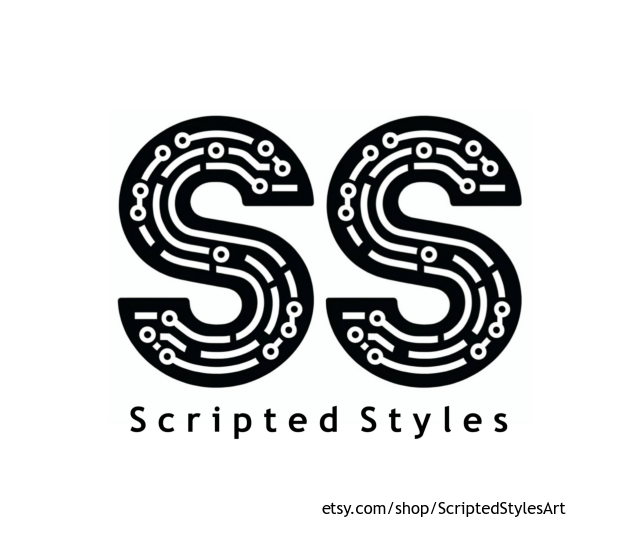

In [17]:
# Load the background image
import matplotlib.pyplot as plt 

import matplotlib.image as mpimg

background_image = mpimg.imread('/Users/henryschnieders/Documents/ScriptedStyles/Designs/Logo/Scripted Styles/SS_Trebuchet MS copy 2.jpg')

# Plot the background image using Axes.imshow
#scale image proportionally
#################################################
#################################################
img_height, img_width, _ = background_image.shape


# Calculate the aspect ratio of the image
aspect_ratio = img_width / img_height


# Calculate the figure size to maintain the aspect ratio
fig_width = 8  # Set your desired figure width
fig_height = fig_width / aspect_ratio

# Create a Matplotlib figure with the calculated size
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
plt.axis('off')
#################################################
#################################################

ax.imshow(background_image, aspect='auto')

font='Trebuchet MS'

font_properties1 = {'family': f'{font}', 'size': 12}
font_properties2 = {'family': f'{font}', 'weight': 'bold', 'size': 14}


#axes/title labels
obj=plt.text((img_width*0.7), int(img_height*(15/16)),"etsy.com/shop/ScriptedStylesArt", ha='center', va='center', fontdict={'fontproperties': font_properties1})
#obj=plt.text((img_width*0.465), int(img_height*(14.98/16)),"Etsy:", ha='center', va='center', fontdict={'fontproperties': font_properties2}, color = '#E89268')


plt.savefig(f'/Users/henryschnieders/Desktop/logo.png', dpi=1200)

In [19]:
import cv2

def get_pixel_color(image_path, x, y):
    # Load image
    image = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB
    b, g, r = image[y, x]  # OpenCV uses row-major indexing (y, x)
    return (r, g, b)  # Convert to standard RGB format

# Example usage
image_path = "/Users/henryschnieders/Desktop/ref.png"
x, y = 100, 50  # Change to the pixel coordinates you want

rgb_color = get_pixel_color(image_path, x, y)
print(f"RGB color at ({x}, {y}): {rgb_color}")


RGB color at (100, 50): (np.uint8(232), np.uint8(146), np.uint8(104))


In [22]:
import cv2
import numpy as np
import os
import subprocess

def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    
    :param image: Input image.
    :param amplitude: Maximum pixel displacement.
    :param frequency: Number of sine cycles over the image height.
    :param phase: Phase shift for the sine wave.
    :return: Distorted image.
    """
    h, w = image.shape[:2]
    # Create a meshgrid of (x,y) coordinates
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    # Compute horizontal displacement based on sine wave along the y axis
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    # Create mapping arrays for remap (ensure float32 type)
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    # Remap the image using the computed displacement
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    return distorted

def create_mockup_video(
    image_path,
    final_image_path,
    output_video_path,
    total_frames=500,
    fps=50,
    max_tilt_fraction=0.05,
    zoom_var=0.7
):
    """
    Creates a video that starts with a zoom/tilt animation from a base image and then
    transitions into a final image with an abstract, tech-y transition effect.
    
    The video structure is:
      - Zoom/Tilt frames from the base image.
      - ~0.75 sec transition frames (with a wavy distortion blending the zoom frame into the final image).
      - 1 sec hold of the final image.
    
    :param image_path: Path to the base mockup image.
    :param final_image_path: Path to the final image to transition to.
    :param output_video_path: Path where the output .mp4 video will be saved.
    :param total_frames: Number of frames for the zoom animation.
    :param fps: Frames per second for the output video.
    :param max_tilt_fraction: Fraction for tilt/shift effect.
    :param zoom_var: Variable controlling the zoom effect.
    """
    # 1. Load the base image
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    H_base, W_base = base_img.shape[:2]
    
    # 2. Decide on an output size (smaller than base) so we have a margin.
    output_scale = 0.2
    out_w = int(W_base * output_scale)
    out_h = int(H_base * output_scale)
    
    # Calculate margins to center the crop in the base image.
    margin_x = (W_base - out_w) // 2
    margin_y = (H_base - out_h) // 2

    # 3. Set up the video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))

    # 4. Define the source points (the rectangle in the base image)
    src_pts = np.float32([
        [margin_x, margin_y],
        [margin_x + out_w - 1, margin_y],
        [margin_x + out_w - 1, margin_y + out_h - 1],
        [margin_x, margin_y + out_h - 1]
    ])

    # 5. Generate zoom/tilt frames from the base image.
    final_zoom_frame = None
    for frame_idx in range(total_frames):
        # Compute a tilt/zoom parameter (adjusting the destination corners)
        tilt = zoom_var * (frame_idx / total_frames) * (out_w / 2.0)
        dst_pts = np.float32([
            [tilt, tilt],                              # top-left
            [out_w - 1 - tilt, tilt],                    # top-right
            [out_w - 1 - tilt, out_h - 1 - tilt],          # bottom-right
            [tilt, out_h - 1 - tilt]                      # bottom-left
        ])
        # Get perspective transform and warp the base image
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)
        frame = cv2.warpPerspective(
            base_img,
            M,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_CONSTANT,
            borderValue=(0, 0, 0)
        )
        writer.write(frame)
        final_zoom_frame = frame.copy()  # save the last zoom frame

    # 6. Load the final image and resize it to match the output dimensions.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read final image: {final_image_path}")
    final_img = cv2.resize(final_img, (out_w, out_h))

    # 7. Create a smooth, tech-y transition (~0.75 sec) from the zoom to the final image.
    transition_frames = int(0.75 * fps)
    max_wave_amp = 20  # Maximum wave amplitude (in pixels) for the distortion effect.
    for i in range(transition_frames):
        t = i / (transition_frames - 1)  # t will go from 0 to 1 over the transition.
        # Vary the distortion amplitude: 0 at start/end, peaking in the middle.
        amplitude = max_wave_amp * np.sin(np.pi * t)
        phase = 2 * np.pi * t  # Phase shift (adds dynamic motion)
        # Apply the wave effect to the last zoom frame.
        distorted_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=4, phase=phase)
        # Blend the distorted zoom frame with the final image.
        blended = cv2.addWeighted(distorted_frame, 1 - t, final_img, t, 0)
        writer.write(blended)
    
    # 8. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_img)
    
    # 9. Cleanup: release the video writer.
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")

# Example usage:
if __name__ == "__main__":
    base_image = '/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/mockup0.jpg'
    final_image = '/Users/henryschnieders/Desktop/logo.png'  # Your final image path.
    output_video = '/Users/henryschnieders/Desktop/mockup0_afterdone.mp4'
    
    create_mockup_video(
        image_path=base_image,
        final_image_path=final_image,
        output_video_path=output_video,
        total_frames=200,      # Adjust number of zoom frames as desired.
        fps=30,                # Frames per second.
        max_tilt_fraction=0.10,
        zoom_var=0.2
    )

    # Optionally, you can compress/convert the video to a 1080x1080 square using FFmpeg:
    def compress_to_1080_square_video(input_path, crf=23, preset='medium', audio_bitrate='128k'):
        """
        Crops/resizes a local video to 1080x1080 using FFmpeg, saving it as <filename>_1080_square.mp4.
        """
        output_path = os.path.splitext(input_path)[0] + "_1080_square.mp4"
        filter_string = (
            "crop=min(iw\\,ih):min(iw\\,ih):"
            "(iw - min(iw\\,ih))/2:(ih - min(iw\\,ih))/2,"
            "scale=1080:1080"
        )
        cmd = [
            "ffmpeg", "-y",
            "-i", input_path,
            "-vf", filter_string,
            "-c:v", "libx264",
            "-crf", str(crf),
            "-preset", preset,
            "-c:a", "aac",
            "-b:a", audio_bitrate,
            output_path
        ]
        subprocess.run(cmd, check=True)
        return output_path

    compressed_video = compress_to_1080_square_video(output_video)
    print(f"[INFO] Compressed video saved to {compressed_video}")


[INFO] Video saved to /Users/henryschnieders/Desktop/mockup0_afterdone.mp4


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_4 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

[INFO] Compressed video saved to /Users/henryschnieders/Desktop/mockup0_afterdone_1080_square.mp4


[out#0/mp4 @ 0x149114170] video:1461KiB audio:0KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.258936%
frame=  252 fps=130 q=-1.0 Lsize=    1464KiB time=00:00:08.33 bitrate=1439.6kbits/s speed=4.31x    
[libx264 @ 0x149115000] frame I:2     Avg QP:18.77  size: 39928
[libx264 @ 0x149115000] frame P:65    Avg QP:19.45  size: 16189
[libx264 @ 0x149115000] frame B:185   Avg QP:24.26  size:  1962
[libx264 @ 0x149115000] consecutive B-frames:  1.6%  0.0%  4.8% 93.7%
[libx264 @ 0x149115000] mb I  I16..4: 25.8% 63.7% 10.5%
[libx264 @ 0x149115000] mb P  I16..4:  4.9% 10.6%  0.7%  P16..4: 29.1%  7.4%  3.4%  0.0%  0.0%    skip:43.8%
[libx264 @ 0x149115000] mb B  I16..4:  0.4%  0.5%  0.0%  B16..8: 17.5%  0.5%  0.1%  direct: 1.7%  skip:79.5%  L0:49.5% L1:42.0% BI: 8.4%
[libx264 @ 0x149115000] 8x8 transform intra:64.0% inter:88.0%
[libx264 @ 0x149115000] coded y,uvDC,uvAC intra: 17.8% 21.3% 10.8% inter: 4.2% 9.1% 4.2%
[libx264 @ 0x149115000] i16 v,h,dc,p: 48% 39%  6%  7%


In [27]:
import cv2
import numpy as np
import os
import subprocess

def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    
    :param image: Input image.
    :param amplitude: Maximum pixel displacement.
    :param frequency: Number of sine cycles over the image height.
    :param phase: Phase shift for the sine wave.
    :return: Distorted image.
    """
    h, w = image.shape[:2]
    # Create a meshgrid of (x, y) coordinates
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    # Compute horizontal displacement based on sine wave along the y axis
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    # Build mapping arrays for remap (must be float32)
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    # Remap the image using the computed displacement
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def create_mockup_video(
    image_path,
    final_image_path,
    output_video_path,
    total_frames=500,
    fps=30,
    max_tilt_fraction=0.05,
    zoom_var=0.7
):
    """
    Creates a video that starts with a zoom/tilt animation from a base image and then
    transitions into a final image with an abstract, tech-y effect.
    
    The video structure is:
      - Zoom/Tilt frames from the base image.
      - A creative 5-second transition (with wave distortion, rotation, scaling, and color shift).
      - A 1-second hold of the final image.
    
    :param image_path: Path to the base (mockup) image.
    :param final_image_path: Path to the final image.
    :param output_video_path: Path to save the .mp4 video.
    :param total_frames: Number of frames for the initial zoom/tilt animation.
    :param fps: Frames per second.
    :param max_tilt_fraction: Fraction for tilt/shift effect.
    :param zoom_var: Controls the zoom effect.
    """
    # 1. Load the base image.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    H_base, W_base = base_img.shape[:2]
    
    # 2. Define output size (a crop of the base image).
    output_scale = 0.2
    out_w = int(W_base * output_scale)
    out_h = int(H_base * output_scale)
    
    # Center the crop.
    margin_x = (W_base - out_w) // 2
    margin_y = (H_base - out_h) // 2

    # 3. Set up the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))

    # 4. Define the source rectangle in the base image.
    src_pts = np.float32([
        [margin_x, margin_y],
        [margin_x + out_w - 1, margin_y],
        [margin_x + out_w - 1, margin_y + out_h - 1],
        [margin_x, margin_y + out_h - 1]
    ])

    # 5. Generate zoom/tilt frames from the base image.
    final_zoom_frame = None
    for frame_idx in range(total_frames):
        # Compute a tilt/zoom parameter.
        tilt = zoom_var * (frame_idx / total_frames) * (out_w / 2.0)
        dst_pts = np.float32([
            [tilt, tilt],                              # top-left
            [out_w - 1 - tilt, tilt],                    # top-right
            [out_w - 1 - tilt, out_h - 1 - tilt],          # bottom-right
            [tilt, out_h - 1 - tilt]                      # bottom-left
        ])
        # Warp the base image.
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)
        frame = cv2.warpPerspective(
            base_img,
            M,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_CONSTANT,
            borderValue=(0, 0, 0)
        )
        writer.write(frame)
        final_zoom_frame = frame.copy()  # Save the last zoom frame.

    # 6. Load the final image and resize it.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read final image: {final_image_path}")
    final_img = cv2.resize(final_img, (out_w, out_h))

    # 7. Create a creative 5-second transition.
    transition_frames = int(5 * fps)
    max_wave_amp = 30  # Maximum wave amplitude in pixels.
    max_angle = 15     # Maximum rotation (degrees) at the start.
    start_scale = 1.1  # Start with a slight zoom.
    end_scale = 1.0    # End at normal scale.

    for i in range(transition_frames):
        t = i / (transition_frames - 1)  # t moves from 0 to 1.
        # Calculate creative parameters:
        amplitude = max_wave_amp * np.sin(np.pi * t)  # Peaks mid-transition.
        phase = 2 * np.pi * t                           # Evolving phase.
        angle = max_angle * (1 - t)                     # Rotate from max_angle to 0.
        scale = start_scale - (start_scale - end_scale) * t  # Scale from start_scale to 1.0.
        
        # (a) Apply a sine-wave distortion to the final zoom frame.
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=4, phase=phase)
        
        # (b) Apply rotation and scaling.
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        
        # (c) Apply a slight color shift for extra tech-y flair.
        shifted_frame = creative_frame.copy()
        # Increase the blue channel slightly at the start, fading to no shift at t=1.
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        
        # (d) Blend the creatively transformed frame with the final image.
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_img, t, 0)
        writer.write(blended)
    
    # 8. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_img)
    
    # 9. Cleanup: release the video writer.
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")

# Optional helper: compress/convert video to a 1080x1080 square using FFmpeg.
def compress_to_1080_square_video(input_path, crf=23, preset='medium', audio_bitrate='128k'):
    """
    Crops/resizes a local video to 1080x1080 using FFmpeg, saving it as <filename>_1080_square.mp4.
    """
    output_path = os.path.splitext(input_path)[0] + "_1080_square.mp4"
    filter_string = (
        "crop=min(iw\\,ih):min(iw\\,ih):"
        "(iw - min(iw\\,ih))/2:(ih - min(iw\\,ih))/2,"
        "scale=1080:1080"
    )
    cmd = [
        "ffmpeg", "-y",
        "-i", input_path,
        "-vf", filter_string,
        "-c:v", "libx264",
        "-crf", str(crf),
        "-preset", preset,
        "-c:a", "aac",
        "-b:a", audio_bitrate,
        output_path
    ]
    subprocess.run(cmd, check=True)
    return output_path

# Example usage:
if __name__ == "__main__":
    base_image = '/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/mockup0.jpg'
    final_image = '/Users/henryschnieders/Desktop/logo.png'  # Final image path.
    output_video = '/Users/henryschnieders/Desktop/mockup0_afterdone.mp4'
    
    create_mockup_video(
        image_path=base_image,
        final_image_path=final_image,
        output_video_path=output_video,
        total_frames=200,      # Number of zoom/tilt frames.
        fps=30,                # Frames per second.
        max_tilt_fraction=0.10,
        zoom_var=0.2
    )

    # # Optionally, compress the video to a 1080x1080 square.
    # compressed_video = compress_to_1080_square_video(output_video)
    # print(f"[INFO] Compressed video saved to {compressed_video}")


[INFO] Video saved to /Users/henryschnieders/Desktop/mockup0_afterdone.mp4


In [28]:
import cv2
import numpy as np
import os
import subprocess

def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    
    :param image: Input image.
    :param amplitude: Maximum pixel displacement.
    :param frequency: Number of sine cycles over the image height.
    :param phase: Phase shift for the sine wave.
    :return: Distorted image.
    """
    h, w = image.shape[:2]
    # Create a meshgrid of (x, y) coordinates
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    # Compute horizontal displacement based on sine wave along the y axis
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    # Build mapping arrays for remap (must be float32)
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    # Remap the image using the computed displacement
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def create_mockup_video(
    image_path,
    final_image_path,
    output_video_path,
    total_frames=500,
    fps=30,
    max_tilt_fraction=0.05,
    zoom_var=0.7
):
    """
    Creates a video that starts with a zoom/tilt animation from a base image and then
    transitions into a final image with an abstract, tech-y effect.
    
    The video structure is:
      - Zoom/Tilt frames from the base image.
      - A creative 5-second transition (with wave distortion, rotation, scaling, and color shift).
      - A 1-second hold of the final image.
    
    :param image_path: Path to the base (mockup) image.
    :param final_image_path: Path to the final image.
    :param output_video_path: Path to save the .mp4 video.
    :param total_frames: Number of frames for the initial zoom/tilt animation.
    :param fps: Frames per second.
    :param max_tilt_fraction: Fraction for tilt/shift effect.
    :param zoom_var: Controls the zoom effect.
    """
    # 1. Load the base image.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    H_base, W_base = base_img.shape[:2]
    
    # 2. Define output size (a crop of the base image).
    output_scale = 0.2
    out_w = int(W_base * output_scale)
    out_h = int(H_base * output_scale)
    
    # Center the crop.
    margin_x = (W_base - out_w) // 2
    margin_y = (H_base - out_h) // 2

    # 3. Set up the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))

    # 4. Define the source rectangle in the base image.
    src_pts = np.float32([
        [margin_x, margin_y],
        [margin_x + out_w - 1, margin_y],
        [margin_x + out_w - 1, margin_y + out_h - 1],
        [margin_x, margin_y + out_h - 1]
    ])

    # 5. Generate zoom/tilt frames from the base image.
    final_zoom_frame = None
    for frame_idx in range(total_frames):
        # Compute a tilt/zoom parameter.
        tilt = zoom_var * (frame_idx / total_frames) * (out_w / 2.0)
        dst_pts = np.float32([
            [tilt, tilt],                              # top-left
            [out_w - 1 - tilt, tilt],                    # top-right
            [out_w - 1 - tilt, out_h - 1 - tilt],          # bottom-right
            [tilt, out_h - 1 - tilt]                      # bottom-left
        ])
        # Warp the base image.
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)
        frame = cv2.warpPerspective(
            base_img,
            M,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_CONSTANT,
            borderValue=(0, 0, 0)
        )
        writer.write(frame)
        final_zoom_frame = frame.copy()  # Save the last zoom frame.

    # 6. Load the final image and resize it.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read final image: {final_image_path}")
    # Use INTER_AREA interpolation to preserve detail when downscaling.
    final_img = cv2.resize(final_img, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # 7. Create a creative 5-second transition.
    transition_frames = int(5 * fps)
    max_wave_amp = 30  # Maximum wave amplitude in pixels.
    max_angle = 15     # Maximum rotation (degrees) at the start.
    start_scale = 1.1  # Start with a slight zoom.
    end_scale = 1.0    # End at normal scale.

    for i in range(transition_frames):
        t = i / (transition_frames - 1)  # t moves from 0 to 1.
        # Calculate creative parameters:
        amplitude = max_wave_amp * np.sin(np.pi * t)  # Peaks mid-transition.
        phase = 2 * np.pi * t                           # Evolving phase.
        angle = max_angle * (1 - t)                     # Rotate from max_angle to 0.
        scale = start_scale - (start_scale - end_scale) * t  # Scale from start_scale to 1.0.
        
        # (a) Apply a sine-wave distortion to the final zoom frame.
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=4, phase=phase)
        
        # (b) Apply rotation and scaling.
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        
        # (c) Apply a slight color shift for extra tech-y flair.
        shifted_frame = creative_frame.copy()
        # Increase the blue channel slightly at the start, fading to no shift at t=1.
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        
        # (d) Blend the creatively transformed frame with the final image.
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_img, t, 0)
        writer.write(blended)
    
    # 8. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_img)
    
    # 9. Cleanup: release the video writer.
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")

# Optional helper: compress/convert video to a 1080x1080 square using FFmpeg.
def compress_to_1080_square_video(input_path, crf=23, preset='medium', audio_bitrate='128k'):
    """
    Crops/resizes a local video to 1080x1080 using FFmpeg, saving it as <filename>_1080_square.mp4.
    """
    output_path = os.path.splitext(input_path)[0] + "_1080_square.mp4"
    filter_string = (
        "crop=min(iw\\,ih):min(iw\\,ih):"
        "(iw - min(iw\\,ih))/2:(ih - min(iw\\,ih))/2,"
        "scale=1080:1080"
    )
    cmd = [
        "ffmpeg", "-y",
        "-i", input_path,
        "-vf", filter_string,
        "-c:v", "libx264",
        "-crf", str(crf),
        "-preset", preset,
        "-c:a", "aac",
        "-b:a", audio_bitrate,
        output_path
    ]
    subprocess.run(cmd, check=True)
    return output_path

# Example usage:
if __name__ == "__main__":
    base_image = '/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/mockup0.jpg'
    final_image = '/Users/henryschnieders/Desktop/logo.png'  # Final image path.
    output_video = '/Users/henryschnieders/Desktop/mockup0_afterdone.mp4'
    
    create_mockup_video(
        image_path=base_image,
        final_image_path=final_image,
        output_video_path=output_video,
        total_frames=200,      # Number of zoom/tilt frames.
        fps=30,                # Frames per second.
        max_tilt_fraction=0.10,
        zoom_var=0.2
    )

    # Optionally, compress the video to a 1080x1080 square.
    # compressed_video = compress_to_1080_square_video(output_video)
    # print(f"[INFO] Compressed video saved to {compressed_video}")


[INFO] Video saved to /Users/henryschnieders/Desktop/mockup0_afterdone.mp4


In [36]:
import cv2
import numpy as np
import os
import subprocess

def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    
    :param image: Input image.
    :param amplitude: Maximum pixel displacement.
    :param frequency: Number of sine cycles over the image height.
    :param phase: Phase shift for the sine wave.
    :return: Distorted image.
    """
    h, w = image.shape[:2]
    # Create a meshgrid of (x, y) coordinates.
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    # Compute horizontal displacement based on sine wave along the y axis.
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    # Build mapping arrays for remap (must be float32).
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    # Remap the image using the computed displacement.
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def crop_center_square(image):
    """
    Crops the input image to a centered square based on its smallest dimension.
    
    :param image: Input image.
    :return: Square-cropped image.
    """
    h, w = image.shape[:2]
    square_size = min(h, w)
    margin_x = (w - square_size) // 2
    margin_y = (h - square_size) // 2
    return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]

def create_mockup_video(
    image_path,
    final_image_path,
    output_video_path,
    total_frames=500,
    fps=30,
    zoom_var=0.7,
    output_scale=0.5  # Scale factor relative to the square side of the base image.
):
    """
    Creates a square video that starts with a zoom/tilt animation from a square crop
    of a base image and then transitions into a final image (also square cropped)
    with an abstract, tech-y effect.
    
    The video structure is:
      - Zoom/Tilt frames from the base image.
      - A creative 5-second transition (with wave distortion, rotation, scaling, and color shift).
      - A 1-second hold of the final image.
    
    :param image_path: Path to the base (mockup) image.
    :param final_image_path: Path to the final image.
    :param output_video_path: Path to save the .mp4 video.
    :param total_frames: Number of frames for the initial zoom/tilt animation.
    :param fps: Frames per second.
    :param zoom_var: Controls the zoom effect.
    :param output_scale: Scale factor for the output relative to the base square crop.
    """
    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square(base_img)
    H_base, W_base = base_square.shape[:2]  # Both are equal.
    
    # 2. Define output size as a scaled version of the square.
    out_size = int(W_base * output_scale)  # Square: out_w == out_h == out_size.
    out_w = out_h = out_size
    
    # Define margins for cropping the base square.
    margin = (W_base - out_size) // 2

    # 3. Set up the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))
    
    # 4. Define the source rectangle in the square base image.
    src_pts = np.float32([
        [margin, margin],
        [margin + out_size - 1, margin],
        [margin + out_size - 1, margin + out_size - 1],
        [margin, margin + out_size - 1]
    ])

    # 5. Generate zoom/tilt frames from the base square image.
    final_zoom_frame = None
    for frame_idx in range(total_frames):
        # Compute a tilt/zoom parameter.
        tilt = zoom_var * (frame_idx / total_frames) * (out_size / 2.0)
        dst_pts = np.float32([
            [tilt, tilt],                              # top-left
            [out_size - 1 - tilt, tilt],               # top-right
            [out_size - 1 - tilt, out_size - 1 - tilt],  # bottom-right
            [tilt, out_size - 1 - tilt]                # bottom-left
        ])
        # Compute perspective transform and warp the base square image.
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)
        frame = cv2.warpPerspective(
            base_square,
            M,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_CONSTANT,
            borderValue=(0, 0, 0)
        )
        writer.write(frame)
        final_zoom_frame = frame.copy()  # Save the last zoom frame.
    
    # 6. Load, crop, and resize the final image.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read final image: {final_image_path}")
    final_square = crop_center_square(final_img)
    # Use INTER_AREA for downscaling.
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # 7. Create a creative 5-second transition.
    transition_frames = int(5 * fps)
    max_wave_amp = 30  # Maximum wave amplitude in pixels.
    max_angle = 15     # Maximum rotation (degrees) at the start.
    start_scale = 1.1  # Start with a slight zoom.
    end_scale = 1.0    # End at normal scale.

    for i in range(transition_frames):
        t = i / (transition_frames - 1)  # t moves from 0 to 1.
        # Calculate creative parameters.
        amplitude = max_wave_amp * np.sin(np.pi * t)  # Peaks mid-transition.
        phase = 2 * np.pi * t                           # Evolving phase.
        angle = max_angle * (1 - t)                     # Rotate from max_angle to 0.
        scale = start_scale - (start_scale - end_scale) * t  # Scale from start_scale to 1.0.
        
        # (a) Apply a sine-wave distortion to the final zoom frame.
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=4, phase=phase)
        
        # (b) Apply rotation and scaling.
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        
        # (c) Apply a slight color shift for extra tech-y flair.
        shifted_frame = creative_frame.copy()
        # Increase the blue channel slightly at the start, fading to no shift at t=1.
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        
        # (d) Blend the creatively transformed frame with the final image.
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        writer.write(blended)
    
    # 8. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_square)
    
    # 9. Cleanup: release the video writer.
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")

# Optional helper: compress/convert video to a 1080x1080 square using FFmpeg.
def compress_to_1080_square_video(input_path, crf=23, preset='medium', audio_bitrate='128k'):
    """
    Crops/resizes a local video to 1080x1080 using FFmpeg, saving it as <filename>_1080_square.mp4.
    """
    output_path = os.path.splitext(input_path)[0] + "_1080_square.mp4"
    filter_string = (
        "crop=min(iw\\,ih):min(iw\\,ih):"
        "(iw - min(iw\\,ih))/2:(ih - min(iw\\,ih))/2,"
        "scale=1080:1080"
    )
    cmd = [
        "ffmpeg", "-y",
        "-i", input_path,
        "-vf", filter_string,
        "-c:v", "libx264",
        "-crf", str(crf),
        "-preset", preset,
        "-c:a", "aac",
        "-b:a", audio_bitrate,
        output_path
    ]
    subprocess.run(cmd, check=True)
    return output_path

# Example usage:
if __name__ == "__main__":
    base_image = '/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/mockup0.jpg'
    final_image = '/Users/henryschnieders/Desktop/logo.png'  # Final image path.
    output_video = '/Users/henryschnieders/Desktop/mockup0_afterdone.mp4'
    
    create_mockup_video(
        image_path=base_image,
        final_image_path=final_image,
        output_video_path=output_video,
        total_frames=200,   # Number of zoom/tilt frames.
        fps=30,             # Frames per second.
        zoom_var=0.2,
        output_scale=0.5    # Adjust as desired.
    )

    # Optionally, compress the video to a 1080x1080 square.
    # compressed_video = compress_to_1080_square_video(output_video)
    # print(f"[INFO] Compressed video saved to {compressed_video}")


[INFO] Video saved to /Users/henryschnieders/Desktop/mockup0_afterdone.mp4


In [6]:
import cv2
import numpy as np
import os
import subprocess

def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    
    :param image: Input image.
    :param amplitude: Maximum pixel displacement.
    :param frequency: Number of sine cycles over the image height.
    :param phase: Phase shift for the sine wave.
    :return: Distorted image.
    """
    h, w = image.shape[:2]
    # Create a meshgrid of (x, y) coordinates.
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    # Compute horizontal displacement based on a sine wave along the y axis.
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    # Build mapping arrays for remap (must be float32).
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    # Remap the image using the computed displacement.
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def crop_center_square(image):
    """
    Crops the input image to a centered square based on its smallest dimension.
    
    :param image: Input image.
    :return: Square-cropped image.
    """
    h, w = image.shape[:2]
    square_size = min(h, w)
    margin_x = (w - square_size) // 2
    margin_y = (h - square_size) // 2
    return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]

def create_mockup_video(
    image_path,
    final_image_path,
    output_video_path,
    total_frames=500,
    fps=30,
    zoom_var=0.7,
    output_scale=0.5  # Scale factor relative to the square side of the base image.
):
    """
    Creates a square video that starts with a zoom/tilt animation from a square crop
    of a base image and then transitions into a final image (also square cropped)
    with an abstract, tech-y effect.
    
    The video structure is:
      - Zoom/Tilt frames from the base image.
      - A creative 7-second transition (with wave distortion, rotation, scaling, color shift,
        and static overlay).
      - A 1-second hold of the final image.
    
    :param image_path: Path to the base (mockup) image.
    :param final_image_path: Path to the final image.
    :param output_video_path: Path to save the .mp4 video.
    :param total_frames: Number of frames for the initial zoom/tilt animation.
    :param fps: Frames per second.
    :param zoom_var: Controls the zoom effect.
    :param output_scale: Scale factor for the output relative to the base square crop.
    """
    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square(base_img)
    H_base, W_base = base_square.shape[:2]  # Both are equal.
    
    # 2. Define output size as a scaled version of the square.
    out_size = int(W_base * output_scale)  # Square: out_w == out_h == out_size.
    out_w = out_h = out_size
    
    # Define margin for cropping the base square.
    margin = (W_base - out_size) // 2

    # 3. Set up the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))
    
    # 4. Define the source rectangle in the square base image.
    src_pts = np.float32([
        [margin, margin],
        [margin + out_size - 1, margin],
        [margin + out_size - 1, margin + out_size - 1],
        [margin, margin + out_size - 1]
    ])

    # 5. Generate zoom/tilt frames from the base square image.
    final_zoom_frame = None
    for frame_idx in range(total_frames):
        # Compute a tilt/zoom parameter.
        tilt = zoom_var * (frame_idx / total_frames) * (out_size / 2.0)
        dst_pts = np.float32([
            [tilt, tilt],                              # top-left
            [out_size - 1 - tilt, tilt],               # top-right
            [out_size - 1 - tilt, out_size - 1 - tilt],  # bottom-right
            [tilt, out_size - 1 - tilt]                # bottom-left
        ])
        # Compute perspective transform and warp the base square image.
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)
        frame = cv2.warpPerspective(
            base_square,
            M,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_CONSTANT,
            borderValue=(0, 0, 0)
        )
        writer.write(frame)
        final_zoom_frame = frame.copy()  # Save the last zoom frame.
    
    # 6. Load, crop, and resize the final image.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read final image: {final_image_path}")
    final_square = crop_center_square(final_img)
    # Use INTER_AREA for downscaling.
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # 7. Create a creative 7-second transition.
    transition_frames = int(7 * fps)
    max_wave_amp = 30  # Maximum wave amplitude in pixels.
    max_angle = 15     # Maximum rotation (degrees) reached at the end of the transition.
    start_scale = 1.1  # Start with a slight zoom.
    end_scale = 1.0    # End at normal scale.

    for i in range(transition_frames):
        t = i / (transition_frames - 1)  # t moves from 0 to 1.
        # Calculate creative parameters.
        amplitude = max_wave_amp * np.sin(np.pi * t)  # Peaks mid-transition.
        phase = 2 * np.pi * t                           # Evolving phase.
        # Smooth rotation starting at 0 degrees and gradually rotating.
        angle = max_angle * t                          
        scale = start_scale - (start_scale - end_scale) * t  # Scale from start_scale to 1.0.
        
        # (a) Apply a sine-wave distortion to the final zoom frame.
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=4, phase=phase)
        
        # (b) Apply rotation and scaling.
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        
        # (c) Apply a slight color shift for extra tech-y flair.
        shifted_frame = creative_frame.copy()
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        
        # (d) Blend the creatively transformed frame with the final image.
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        
        # (e) Generate a layer of static (noise) and blend it in.
        # Create random noise image.
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        # Let the static fade out from 30% opacity to 0% over the transition.
        static_alpha = 0.3 * (1 - t)
        blended = cv2.addWeighted(blended, 1.0, noise, static_alpha, 0)
        
        writer.write(blended)
    
    # 8. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_square)
    
    # 9. Cleanup: release the video writer.
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")

# Optional helper: compress/convert video to a 1080x1080 square using FFmpeg.
def compress_to_1080_square_video(input_path, crf=23, preset='medium', audio_bitrate='128k'):
    """
    Crops/resizes a local video to 1080x1080 using FFmpeg, saving it as <filename>_1080_square.mp4.
    """
    output_path = os.path.splitext(input_path)[0] + "_1080_square.mp4"
    filter_string = (
        "crop=min(iw\\,ih):min(iw\\,ih):"
        "(iw - min(iw\\,ih))/2:(ih - min(iw\\,ih))/2,"
        "scale=1080:1080"
    )
    cmd = [
        "ffmpeg", "-y",
        "-i", input_path,
        "-vf", filter_string,
        "-c:v", "libx264",
        "-crf", str(crf),
        "-preset", preset,
        "-c:a", "aac",
        "-b:a", audio_bitrate,
        output_path
    ]
    subprocess.run(cmd, check=True)
    return output_path

# Example usage:
if __name__ == "__main__":
    base_image = '/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/mockup0.jpg'
    final_image = '/Users/henryschnieders/Desktop/logo.png'  # Final image path.
    output_video = '/Users/henryschnieders/Desktop/mockup0_afterdone.mp4'
    
    create_mockup_video(
        image_path=base_image,
        final_image_path=final_image,
        output_video_path=output_video,
        total_frames=200,   # Number of zoom/tilt frames.
        fps=30,             # Frames per second.
        zoom_var=0.2,
        output_scale=0.5    # Adjust as desired.
    )

    # Optionally, compress the video to a 1080x1080 square.
    # compressed_video = compress_to_1080_square_video(output_video)
    # print(f"[INFO] Compressed video saved to {compressed_video}")


KeyboardInterrupt: 

In [42]:
import cv2
import numpy as np
import os
import subprocess

def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    
    :param image: Input image.
    :param amplitude: Maximum pixel displacement.
    :param frequency: Number of sine cycles over the image height.
    :param phase: Phase shift for the sine wave.
    :return: Distorted image.
    """
    h, w = image.shape[:2]
    # Create a meshgrid of (x, y) coordinates.
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    # Compute horizontal displacement based on a sine wave along the y axis.
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    # Build mapping arrays for remap (must be float32).
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    # Remap the image using the computed displacement.
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def crop_center_square(image):
    """
    Crops the input image to a centered square based on its smallest dimension.
    
    :param image: Input image.
    :return: Square-cropped image.
    """
    h, w = image.shape[:2]
    square_size = min(h, w)
    margin_x = (w - square_size) // 2
    margin_y = (h - square_size) // 2
    return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]

def create_mockup_video(
    image_path,
    final_image_path,
    output_video_path,
    total_frames=500,
    fps=30,
    zoom_var=0.7,
    output_scale=0.5  # Scale factor relative to the square side of the base image.
):
    """
    Creates a square video that starts with a zoom/tilt animation from a square crop
    of a base image and then transitions into a final image (also square cropped)
    with an abstract, tech-y effect.
    
    The video structure is:
      - Zoom/Tilt frames from the base image.
      - A creative 7-second transition (with wave distortion, rotation, scaling, color shift,
        and a dynamic static overlay).
      - A 1-second hold of the final image.
    
    :param image_path: Path to the base (mockup) image.
    :param final_image_path: Path to the final image.
    :param output_video_path: Path to save the .mp4 video.
    :param total_frames: Number of frames for the initial zoom/tilt animation.
    :param fps: Frames per second.
    :param zoom_var: Controls the zoom effect.
    :param output_scale: Scale factor for the output relative to the base square crop.
    """
    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square(base_img)
    H_base, W_base = base_square.shape[:2]  # Both are equal.
    
    # 2. Define output size as a scaled version of the square.
    out_size = int(W_base * output_scale)  # Square: out_w == out_h == out_size.
    out_w = out_h = out_size
    
    # Define margin for cropping the base square.
    margin = (W_base - out_size) // 2

    # 3. Set up the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))
    
    # 4. Define the source rectangle in the square base image.
    src_pts = np.float32([
        [margin, margin],
        [margin + out_size - 1, margin],
        [margin + out_size - 1, margin + out_size - 1],
        [margin, margin + out_size - 1]
    ])

    # 5. Generate zoom/tilt frames from the base square image.
    final_zoom_frame = None
    for frame_idx in range(total_frames):
        # Compute a tilt/zoom parameter.
        tilt = zoom_var * (frame_idx / total_frames) * (out_size / 2.0)
        dst_pts = np.float32([
            [tilt, tilt],                              # top-left
            [out_size - 1 - tilt, tilt],               # top-right
            [out_size - 1 - tilt, out_size - 1 - tilt],  # bottom-right
            [tilt, out_size - 1 - tilt]                # bottom-left
        ])
        # Compute perspective transform and warp the base square image.
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)
        frame = cv2.warpPerspective(
            base_square,
            M,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_CONSTANT,
            borderValue=(0, 0, 0)
        )
        writer.write(frame)
        final_zoom_frame = frame.copy()  # Save the last zoom frame.
    
    # 6. Load, crop, and resize the final image.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read final image: {final_image_path}")
    final_square = crop_center_square(final_img)
    # Use INTER_AREA for downscaling.
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # Precompute a coordinate grid for the dynamic alpha map (values 0 to 16*pi).
    w_vals = np.linspace(0, 16 * np.pi, out_w)
    h_vals = np.linspace(0, 16 * np.pi, out_h)
    W_grid, H_grid = np.meshgrid(w_vals, h_vals)
    
    # 7. Create a creative 7-second transition.
    transition_frames = int(7 * fps)
    max_wave_amp = 35  # Maximum wave amplitude in pixels.
    max_angle = 20    # Maximum rotation (degrees) reached at the end of the transition.
    start_scale = 1.1  # Start with a slight zoom.
    end_scale = 1.0    # End at normal scale.
    max_static_alpha = 1  # Maximum static opacity.

    for i in range(transition_frames):
        t = i / (transition_frames - 1)  # t moves from 0 to 1.
        # Calculate creative parameters.
        amplitude = max_wave_amp * np.sin(8*np.pi * t)  # Peaks mid-transition.
        phase = 2 * np.pi * t                           # Evolving phase.
        # Smooth rotation starting at 0 degrees and gradually rotating.
        angle = max_angle * t                          
        scale = start_scale - (start_scale - end_scale) * t  # Scale from start_scale to 1.0.
        
        # (a) Apply a sine-wave distortion to the final zoom frame.
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=4, phase=phase)
        
        # (b) Apply rotation and scaling.
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        
        # (c) Apply a slight color shift for extra tech-y flair.
        shifted_frame = creative_frame.copy()
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        
        # (d) Blend the creatively transformed frame with the final image.
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        
        # (e) Generate a noise layer (static).
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        
        # (f) Create a dynamic per-pixel alpha map for the static overlay.
        # Formula: max_static_alpha*sin(t)*0.25*(2 - (cos(w) + sin(h)))
        alpha_map = max_static_alpha * np.sin(2*np.pi*t) * 0.25 * (2 - (np.cos(W_grid) + np.sin(H_grid)))
        # Expand alpha_map to 3 channels.
        alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        
        # Blend the noise with the current blended frame using the dynamic alpha map.
        blended = (blended.astype(np.float32) * (1 - alpha_map_3) + 
                   noise.astype(np.float32) * alpha_map_3).astype(np.uint8)
        
        writer.write(blended)
    
    # 8. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_square)
    
    # 9. Cleanup: release the video writer.
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")

# Optional helper: compress/convert video to a 1080x1080 square using FFmpeg.
def compress_to_1080_square_video(input_path, crf=23, preset='medium', audio_bitrate='128k'):
    """
    Crops/resizes a local video to 1080x1080 using FFmpeg, saving it as <filename>_1080_square.mp4.
    """
    output_path = os.path.splitext(input_path)[0] + "_1080_square.mp4"
    filter_string = (
        "crop=min(iw\\,ih):min(iw\\,ih):"
        "(iw - min(iw\\,ih))/2:(ih - min(iw\\,ih))/2,"
        "scale=1080:1080"
    )
    cmd = [
        "ffmpeg", "-y",
        "-i", input_path,
        "-vf", filter_string,
        "-c:v", "libx264",
        "-crf", str(crf),
        "-preset", preset,
        "-c:a", "aac",
        "-b:a", audio_bitrate,
        output_path
    ]
    subprocess.run(cmd, check=True)
    return output_path

# Example usage:
if __name__ == "__main__":
    base_image = '/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/mockup0.jpg'
    final_image = '/Users/henryschnieders/Desktop/logo.png'  # Final image path.
    output_video = '/Users/henryschnieders/Desktop/mockup0_afterdone.mp4'
    
    create_mockup_video(
        image_path=base_image,
        final_image_path=final_image,
        output_video_path=output_video,
        total_frames=200,   # Number of zoom/tilt frames.
        fps=30,             # Frames per second.
        zoom_var=0.2,
        output_scale=0.5    # Adjust as desired.
    )

    # Optionally, compress the video to a 1080x1080 square.
    # compressed_video = compress_to_1080_square_video(output_video)
    # print(f"[INFO] Compressed video saved to {compressed_video}")


[INFO] Video saved to /Users/henryschnieders/Desktop/mockup0_afterdone.mp4


In [56]:
import cv2
import numpy as np
import os
import subprocess

def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    
    :param image: Input image.
    :param amplitude: Maximum pixel displacement.
    :param frequency: Number of sine cycles over the image height.
    :param phase: Phase shift for the sine wave.
    :return: Distorted image.
    """
    h, w = image.shape[:2]
    # Create a meshgrid of (x, y) coordinates.
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    # Compute horizontal displacement based on a sine wave along the y axis.
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    # Build mapping arrays for remap (must be float32).
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    # Remap the image using the computed displacement.
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def crop_center_square(image):
    """
    Crops the input image to a centered square based on its smallest dimension.
    
    :param image: Input image.
    :return: Square-cropped image.
    """
    h, w = image.shape[:2]
    square_size = min(h, w)
    margin_x = (w - square_size) // 2
    margin_y = (h - square_size) // 2
    return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]


def max_static_alpha(t):
    """ t is valued from 0 to 1

    Args:
        t (_type_): _description_
    """
    factor = 1/(1+np.exp(-10*(t-0.5)))

    return 1/(1+np.exp(-10*((1/factor)*t-0.9)))

def create_mockup_video(
    image_path,
    final_image_path,
    output_video_path,
    total_frames=200,   # Number of zoom frames.
    fps=30,
    zoom_duration_frames=200,  # For dynamic zoom
    output_scale=1.0  # We will output the full square (so set to 1.0)
):
    """
    Creates a square video that starts with a dynamic zoom from a square crop
    of a base image and then transitions into a final image (also square cropped)
    with an abstract, tech-y effect.
    
    The video structure is:
      - Dynamic Zoom frames (from an initial offset crop to the full square)
      - A creative 7-second transition (with wave distortion, rotation, scaling, color shift,
        and a dynamic static overlay).
      - A 1-second hold of the final image.
    
    :param image_path: Path to the base image.
    :param final_image_path: Path to the final image.
    :param output_video_path: Path to save the .mp4 video.
    :param total_frames: Number of frames for the zoom sequence.
    :param fps: Frames per second.
    :param zoom_duration_frames: Number of frames for the dynamic zoom.
    :param output_scale: Scale factor for output relative to the base square crop (1.0 = full square).
    """
    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square(base_img)
    S = base_square.shape[0]  # Base square side length
    
    # 2. Define the output size. We want a square video.
    out_size = int(S * output_scale)  # Here output_scale=1.0 means full resolution of the square crop.
    out_w = out_h = out_size

    # 3. Set up the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))
    
    # 4. Generate dynamic zoom frames.
    # Define initial crop parameters:
    # Initial crop size is 60% of S.
    init_crop_size = 0.6 * S
    # Initial crop center is shifted to the right by 10% of S.
    init_center = (S/2 + 0.1 * S, S/2)
    # Final crop: full square with center at (S/2, S/2) and size S.
    final_crop_size = S
    final_center = (S/2, S/2)
    
    for frame_idx in range(zoom_duration_frames):
        alpha = frame_idx / (zoom_duration_frames - 1)  # Goes from 0 to 1.
        # Interpolate crop size and center.
        current_size = (1 - alpha) * init_crop_size + alpha * final_crop_size
        current_center_x = (1 - alpha) * init_center[0] + alpha * final_center[0]
        current_center_y = (1 - alpha) * init_center[1] + alpha * final_center[1]
        # Calculate crop rectangle (make sure coordinates are integers).
        x0 = int(current_center_x - current_size/2)
        y0 = int(current_center_y - current_size/2)
        x1 = int(x0 + current_size)
        y1 = int(y0 + current_size)
        # Ensure the crop rectangle is within base_square boundaries.
        x0 = max(0, x0)
        y0 = max(0, y0)
        x1 = min(S, x1)
        y1 = min(S, y1)
        # Crop and resize to output size.
        crop_frame = base_square[y0:y1, x0:x1]
        frame = cv2.resize(crop_frame, (out_w, out_h), interpolation=cv2.INTER_LINEAR)
        writer.write(frame)
        final_zoom_frame = frame.copy()  # Save the last zoom frame.

    # 5. Load, crop, and resize the final image.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read final image: {final_image_path}")
    final_square = crop_center_square(final_img)
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # Precompute a coordinate grid for the dynamic alpha map (values 0 to 16*pi).
    w_vals = np.linspace(0, 16 * np.pi, out_w)
    h_vals = np.linspace(0, 16 * np.pi, out_h)
    W_grid, H_grid = np.meshgrid(w_vals, h_vals)
    
    # 6. Create a creative 7-second transition.
    transition_frames = int(4 * fps)
    max_wave_amp = 30   # Maximum wave amplitude in pixels.
    max_angle = 15      # Maximum rotation (degrees) at the end of the transition.
    start_scale = 1.1   # Start with a slight zoom.
    end_scale = 1.0     # End at normal scale.

    
    for i in range(transition_frames):
        t = i / (transition_frames - 1)  # t moves from 0 to 1.
        # Calculate creative parameters.
        amplitude = max_wave_amp * np.sin(9*np.pi * t)  # Peaks mid-transition.
        phase = 4 * np.pi * t                           # Evolving phase.
        # Smooth rotation starting at 0 degrees and gradually increasing.
        angle = max_angle * t                          
        scale = start_scale - (start_scale - end_scale) * t  # Scale from start_scale to 1.0.
        
        # (a) Apply a sine-wave distortion to the final zoom frame.
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=6, phase=phase)
        
        # (b) Apply rotation and scaling.
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        
        # (c) Apply a slight color shift for extra tech-y flair.
        shifted_frame = creative_frame.copy()
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        
        # (d) Blend the creatively transformed frame with the final image.
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        
        # (e) Generate a noise layer (static).
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        
        # (f) Create a dynamic per-pixel alpha map for the static overlay.
        # Formula: max_static_alpha*sin(t)*0.25*(2 - (cos(w) + sin(h)))
        alpha_map = np.abs( max_static_alpha(t) * np.sin(1.6*np.pi*t-1.3*np.pi) * 0.25 * (2 - (np.cos(W_grid) + np.sin(H_grid))) )
        # Expand alpha_map to 3 channels.
        alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        
        # Blend the noise with the current blended frame using the dynamic alpha map.
        blended = (blended.astype(np.float32) * (1 - alpha_map_3) + 
                   noise.astype(np.float32) * alpha_map_3).astype(np.uint8)
        
        writer.write(blended)
    
    # 7. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_square)
    
    # 8. Cleanup: release the video writer.
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")

# Optional helper: compress/convert video to a 1080x1080 square using FFmpeg.
def compress_to_1080_square_video(input_path, crf=23, preset='medium', audio_bitrate='128k'):
    """
    Crops/resizes a local video to 1080x1080 using FFmpeg, saving it as <filename>_1080_square.mp4.
    """
    output_path = os.path.splitext(input_path)[0] + "_1080_square.mp4"
    filter_string = (
        "crop=min(iw\\,ih):min(iw\\,ih):"
        "(iw - min(iw\\,ih))/2:(ih - min(iw\\,ih))/2,"
        "scale=1080:1080"
    )
    cmd = [
        "ffmpeg", "-y",
        "-i", input_path,
        "-vf", filter_string,
        "-c:v", "libx264",
        "-crf", str(crf),
        "-preset", preset,
        "-c:a", "aac",
        "-b:a", audio_bitrate,
        output_path
    ]
    subprocess.run(cmd, check=True)
    return output_path

# Example usage:
if __name__ == "__main__":
    base_image = '/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/mockup0.jpg'
    final_image = '/Users/henryschnieders/Desktop/logo.png'  # Final image path.
    output_video = '/Users/henryschnieders/Desktop/mockup0_afterdone.mp4'
    
    create_mockup_video(
        image_path=base_image,
        final_image_path=final_image,
        output_video_path=output_video,
        total_frames=200,          # Total frames for zoom sequence.
        fps=30,
        zoom_duration_frames=200,  # Dynamic zoom duration.
        output_scale=1.0           # Full square output.
    )

    # Optionally, compress the video to a 1080x1080 square.
    # compressed_video = compress_to_1080_square_video(output_video)
    # print(f"[INFO] Compressed video saved to {compressed_video}")


[INFO] Video saved to /Users/henryschnieders/Desktop/mockup0_afterdone.mp4


In [6]:
import os
import subprocess

def compress_to_1080_square_video(input_path, crf=28, preset='fast', audio_bitrate='128k'):
    """
    Crops/resizes a local video to 1080x1080 using FFmpeg and adds the +faststart flag,
    saving it as <filename>_1080_square.mp4.
    
    Adjusted parameters (crf=28, preset='fast') may produce a file that is easier to decode,
    thereby reducing any playback lag.
    """
    output_path = os.path.splitext(input_path)[0] + "_1080_square.mp4"
    filter_string = (
        "crop=min(iw\\,ih):min(iw\\,ih):"
        "(iw - min(iw\\,ih))/2:(ih - min(iw\\,ih))/2,"
        "scale=1080:1080"
    )
    cmd = [
        "ffmpeg", "-y",
        "-i", input_path,
        "-vf", filter_string,
        "-c:v", "libx264",
        "-crf", str(crf),
        "-preset", preset,
        "-movflags", "+faststart",   # enables progressive download
        "-c:a", "aac",
        "-b:a", audio_bitrate,
        output_path
    ]
    subprocess.run(cmd, check=True)
    return output_path


compress_to_1080_square_video('/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/chosen_video.mp4', crf=28, preset='fast', audio_bitrate='128k')


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_4 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

'/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/chosen_video_1080_square.mp4'

In [8]:
import cv2

def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    
    :param image: Input image.
    :param amplitude: Maximum pixel displacement.
    :param frequency: Number of sine cycles over the image height.
    :param phase: Phase shift for the sine wave.
    :return: Distorted image.
    """
    h, w = image.shape[:2]
    # Create a meshgrid of (x, y) coordinates.
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    # Compute horizontal displacement based on a sine wave along the y axis.
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    # Build mapping arrays for remap (must be float32).
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    # Remap the image using the computed displacement.
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def crop_center_square(image):
    """
    Crops the input image to a centered square based on its smallest dimension.
    
    :param image: Input image.
    :return: Square-cropped image.
    """
    h, w = image.shape[:2]
    square_size = min(h, w)
    margin_x = (w - square_size) // 2
    margin_y = (h - square_size) // 2
    return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]

def max_static_alpha(t):
    """ t is valued from 0 to 1

    Args:
        t (_type_): _description_
    """
    factor = 1/(1+np.exp(-10*(t-0.9)))

    return 1/(1+np.exp(-10*((1/factor)*t-0.9)))


def create_mockup_video(
    image_path,
    output_video_path,
    final_image_path,
    total_frames=500,   # Number of zoom frames.
    fps=50,
    zoom_duration_frames=200,  # For dynamic zoom
    output_scale=1.0  # We will output the full square (so set to 1.0)
):
    """
    Creates a square video that starts with a creative 2-second intro,
    then a dynamic zoom, followed by a 7-second transition and a final hold.
    """
    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square(base_img)
    S = base_square.shape[0]  # Base square side length
    
    # 2. Define the output size.
    out_size = int(S * output_scale)
    out_w = out_h = out_size

    # 3. Set up the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))
    
    # 3a. -- INTRO: Create a 2-second creative intro --
    intro_frames = int(2 * fps)
    max_intro_amp = 20  # Maximum amplitude for the intro wave effect.
    for i in range(intro_frames):
        t = i / (intro_frames - 1)  # t in [0,1]
        # For the intro, gradually ramp up the wave amplitude and a slight rotation.
        amplitude = max_intro_amp * np.sin(np.pi * t)
        phase = 2 * np.pi * t
        angle = 10 * t  # rotate from 0 to 10 degrees
        # Apply wave effect to the base_square.
        intro_frame = apply_wave_effect(base_square, amplitude=amplitude, frequency=4, phase=phase)
        # Rotate the frame.
        center = (out_w/2, out_h/2)
        rotM = cv2.getRotationMatrix2D(center, angle, 1.0)
        intro_frame = cv2.warpAffine(
            intro_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        writer.write(intro_frame)
    
    # 4. Generate dynamic zoom frames.
    # Define initial crop parameters:
    init_crop_size = 0.6 * S
    init_center = (S/2 + 0.1 * S, S/2)
    final_crop_size = S
    final_center = (S/2, S/2)
    
    for frame_idx in range(zoom_duration_frames):
        alpha = frame_idx / (zoom_duration_frames - 1)  # from 0 to 1.
        current_size = (1 - alpha) * init_crop_size + alpha * final_crop_size
        current_center_x = (1 - alpha) * init_center[0] + alpha * final_center[0]
        current_center_y = (1 - alpha) * init_center[1] + alpha * final_center[1]
        x0 = int(current_center_x - current_size/2)
        y0 = int(current_center_y - current_size/2)
        x1 = int(x0 + current_size)
        y1 = int(y0 + current_size)
        x0 = max(0, x0)
        y0 = max(0, y0)
        x1 = min(S, x1)
        y1 = min(S, y1)
        crop_frame = base_square[y0:y1, x0:x1]
        frame = cv2.resize(crop_frame, (out_w, out_h), interpolation=cv2.INTER_LINEAR)
        writer.write(frame)
        final_zoom_frame = frame.copy()  # Save the last zoom frame.

    # 5. Load, crop, and resize the final image.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read final image: {final_image_path}")
    final_square = crop_center_square(final_img)
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # Precompute a coordinate grid for the dynamic alpha map.
    w_vals = np.linspace(0, 16 * np.pi, out_w)
    h_vals = np.linspace(0, 16 * np.pi, out_h)
    W_grid, H_grid = np.meshgrid(w_vals, h_vals)
    
    # 6. Create a creative 7-second transition.
    transition_frames = int(3 * fps)
    max_wave_amp = 30
    max_angle = 15
    start_scale = 1.1
    end_scale = 1.0
    
    for i in range(transition_frames):
        t = i / (transition_frames - 1)
        amplitude = max_wave_amp * np.sin(9*np.pi * t)
        phase = 4 * np.pi * t
        angle = max_angle * t                          
        scale = start_scale - (start_scale - end_scale) * t  
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=6, phase=phase)
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        shifted_frame = creative_frame.copy()
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        alpha_map = np.abs( max_static_alpha(t) * np.sin(1.6*np.pi*t-1.3*np.pi) * 0.25 * (2 - (np.cos(W_grid) + np.sin(H_grid))) )
        alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        blended = (blended.astype(np.float32) * (1 - alpha_map_3) + 
                   noise.astype(np.float32) * alpha_map_3).astype(np.uint8)
        writer.write(blended)
    
    # 7. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_square)
    
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")


create_mockup_video(image_path = '/Users/henryschnieders/Documents/ScriptedStyles/Designs/Releases/Next_release/2D Particle Gas/images/binary_cool111111_1080_square.jpg',
                    output_video_path = '/Users/henryschnieders/Desktop/binary_cool111111_1080_square.mp4',
                    final_image_path = '/Users/henryschnieders/Desktop/logo.png')

[INFO] Video saved to /Users/henryschnieders/Desktop/binary_cool111111_1080_square.mp4


# Hook edited

In [ ]:
import cv2
import numpy as np
import os
import subprocess

def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    """
    h, w = image.shape[:2]
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def crop_center_square(image):
    """
    Crops the input image to a centered square based on its smallest dimension.
    """
    h, w = image.shape[:2]
    square_size = min(h, w)
    margin_x = (w - square_size) // 2
    margin_y = (h - square_size) // 2
    return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]

def max_static_alpha(t):
    """ t is valued from 0 to 1 """
    factor = 1/(1+np.exp(-10*(t-0.5)))
    return 1/(1+np.exp(-10*((1/factor)*t-0.9)))

def create_mockup_video(
    image_path,
    output_video_path,
    final_image_path,
    total_frames=500,           # Number of zoom frames.
    fps=50,
    zoom_duration_frames=200,   # For dynamic zoom
    output_scale=1.0            # Full square output.
):
    """
    Creates a square video that begins with a creative hook that smoothly transforms
    the base image into the starting zoom frame, then continues with a dynamic zoom,
    a creative 7-second transition, and a final hold.
    """
    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square(base_img)
    S = base_square.shape[0]  # Side length of the square

    # 2. Define the output size.
    out_size = int(S * output_scale)
    out_w = out_h = out_size

    # 3. Set up the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))

    # 4. Compute the first dynamic zoom frame (zoom_start)
    #    Dynamic zoom parameters:
    init_crop_size = 0.6 * S
    init_center = (S/2 + 0.1 * S, S/2)
    # For frame 0, alpha = 0.
    x0 = int(init_center[0] - init_crop_size/2)
    y0 = int(init_center[1] - init_crop_size/2)
    x1 = int(x0 + init_crop_size)
    y1 = int(y0 + init_crop_size)
    x0 = max(0, x0)
    y0 = max(0, y0)
    x1 = min(S, x1)
    y1 = min(S, y1)
    crop_zoom_start = base_square[y0:y1, x0:x1]
    zoom_start = cv2.resize(crop_zoom_start, (out_w, out_h), interpolation=cv2.INTER_LINEAR)

    # 5. Generate the introductory hook that transitions from base_square to zoom_start.
    #    We’ll use a 2-second (intro_frames) sequence.
    intro_frames = int(2 * fps)
    max_intro_amp = 20  # Maximum amplitude for the wave effect during intro.
    for i in range(intro_frames):
        t = i / (intro_frames - 1)  # t goes from 0 to 1.
        # (a) Apply a wave effect whose strength ramps up and then down:
        amplitude = max_intro_amp * np.sin(np.pi * t)
        phase = 2 * np.pi * t
        creative = apply_wave_effect(base_square, amplitude=amplitude, frequency=4, phase=phase)
        # (b) Apply a subtle rotation.
        angle = 10 * t  # Rotate up to 10 degrees.
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, 1.0)
        creative = cv2.warpAffine(
            creative,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        # (c) Crossfade from the creative frame to the zoom_start.
        # At t=0, we show 100% creative (which is nearly the unaltered base_square);
        # at t=1, we want 100% zoom_start.
        hook_frame = cv2.addWeighted(creative, 1 - t, zoom_start, t, 0)
        writer.write(hook_frame)
    
    # 6. Generate dynamic zoom frames.
    #    Since the last intro frame equals zoom_start, start zoom frames at frame_idx=1.
    final_zoom_frame = None
    for frame_idx in range(1, zoom_duration_frames):
        alpha = frame_idx / (zoom_duration_frames - 1)
        # Interpolate crop parameters.
        current_size = (1 - alpha) * init_crop_size + alpha * S
        current_center_x = (1 - alpha) * init_center[0] + alpha * (S/2)
        current_center_y = (1 - alpha) * init_center[1] + alpha * (S/2)
        x0 = int(current_center_x - current_size/2)
        y0 = int(current_center_y - current_size/2)
        x1 = int(x0 + current_size)
        y1 = int(y0 + current_size)
        x0 = max(0, x0)
        y0 = max(0, y0)
        x1 = min(S, x1)
        y1 = min(S, y1)
        crop_frame = base_square[y0:y1, x0:x1]
        frame = cv2.resize(crop_frame, (out_w, out_h), interpolation=cv2.INTER_LINEAR)
        writer.write(frame)
        final_zoom_frame = frame.copy()  # Save the last zoom frame.
    
    # 7. Load and prepare the final image.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read final image: {final_image_path}")
    final_square = crop_center_square(final_img)
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # Precompute a coordinate grid for the dynamic alpha map used in the transition.
    w_vals = np.linspace(0, 16 * np.pi, out_w)
    h_vals = np.linspace(0, 16 * np.pi, out_h)
    W_grid, H_grid = np.meshgrid(w_vals, h_vals)
    
    # 8. Create a creative 7-second transition.
    transition_frames = int(3 * fps)
    max_wave_amp = 30
    max_angle = 15
    start_scale = 1.1
    end_scale = 1.0
    
    for i in range(transition_frames):
        t = i / (transition_frames - 1)
        amplitude = max_wave_amp * np.sin(9 * np.pi * t)
        phase = 4 * np.pi * t
        angle = max_angle * t                          
        scale = start_scale - (start_scale - end_scale) * t  
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=6, phase=phase)
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        shifted_frame = creative_frame.copy()
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        alpha_map = np.abs( max_static_alpha(t) * np.sin(1.6*np.pi*t - 1.3*np.pi) *
                            0.25 * (2 - (np.cos(W_grid) + np.sin(H_grid))) )
        alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        blended = (blended.astype(np.float32) * (1 - alpha_map_3) + 
                   noise.astype(np.float32) * alpha_map_3).astype(np.uint8)
        writer.write(blended)
    
    # 9. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_square)
    
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")


create_mockup_video(image_path = '/Users/henryschnieders/Documents/ScriptedStyles/Designs/Releases/Next_release/2D Particle Gas/images/binary_cool111111_1080_square.jpg',
                    output_video_path = '/Users/henryschnieders/Desktop/binary_cool111111_1080_square.mp4',
                    final_image_path = '/Users/henryschnieders/Desktop/logo.png')


[INFO] Video saved to /Users/henryschnieders/Desktop/binary_cool111111_1080_square.mp4


In [12]:
import cv2
import numpy as np
import os
import subprocess

def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    """
    h, w = image.shape[:2]
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def crop_center_square(image):
    """
    Crops the input image to a centered square based on its smallest dimension.
    """
    h, w = image.shape[:2]
    square_size = min(h, w)
    margin_x = (w - square_size) // 2
    margin_y = (h - square_size) // 2
    return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]

def max_static_alpha(t):
    """ t is valued from 0 to 1 """
    factor = 1/(1+np.exp(-10*(t-0.5)))
    return 1/(1+np.exp(-10*((1/factor)*t-0.9)))

def create_mockup_video(
    image_path,
    output_video_path,
    final_image_path,
    total_frames=500,           # Number of zoom frames.
    fps=50,
    zoom_duration_frames=200,   # For dynamic zoom
    output_scale=1.0,           # Full square output.
    zoom_intensity=0.6          # Fraction of the full image used in the initial crop.
):
    """
    Creates a square video that begins with a creative hook that smoothly transforms
    the base image into the starting zoom frame, then continues with a dynamic zoom,
    a creative 7-second transition, and a final hold.
    
    Parameters:
      - zoom_intensity: Fraction (0 < zoom_intensity <= 1) representing the size of the 
                        initial crop relative to the full image. A lower value means a 
                        more intense zoom (i.e. starting from a smaller portion of the image).
    """
    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square(base_img)
    S = base_square.shape[0]  # Side length of the square

    # 2. Define the output size.
    out_size = int(S * output_scale)
    out_w = out_h = out_size

    # 3. Set up the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))

    # 4. Compute the first dynamic zoom frame (zoom_start)
    #    Use the new zoom_intensity parameter to define the initial crop size.
    init_crop_size = zoom_intensity * S
    # Optionally, you can still offset the initial center; here we keep the same offset.
    init_center = (S/2 + 0.1 * S, S/2)
    x0 = int(init_center[0] - init_crop_size/2)
    y0 = int(init_center[1] - init_crop_size/2)
    x1 = int(x0 + init_crop_size)
    y1 = int(y0 + init_crop_size)
    x0 = max(0, x0)
    y0 = max(0, y0)
    x1 = min(S, x1)
    y1 = min(S, y1)
    crop_zoom_start = base_square[y0:y1, x0:x1]
    zoom_start = cv2.resize(crop_zoom_start, (out_w, out_h), interpolation=cv2.INTER_LINEAR)

    # 5. Generate the introductory hook that transitions from base_square to zoom_start.
    intro_frames = int(2 * fps)
    max_intro_amp = 20  # Maximum amplitude for the wave effect during intro.
    for i in range(intro_frames):
        t = i / (intro_frames - 1)  # t goes from 0 to 1.
        # (a) Apply a wave effect whose strength ramps up and then down:
        amplitude = max_intro_amp * np.sin(np.pi * t)
        phase = 2 * np.pi * t
        creative = apply_wave_effect(base_square, amplitude=amplitude, frequency=4, phase=phase)
        # (b) Apply a subtle rotation.
        angle = 10 * t  # Rotate up to 10 degrees.
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, 1.0)
        creative = cv2.warpAffine(
            creative,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        # (c) Crossfade from the creative frame to the zoom_start.
        hook_frame = cv2.addWeighted(creative, 1 - t, zoom_start, t, 0)
        writer.write(hook_frame)
    
    # 6. Generate dynamic zoom frames.
    #    Since the last intro frame equals zoom_start, start zoom frames at frame_idx=1.
    final_zoom_frame = None
    for frame_idx in range(1, zoom_duration_frames):
        alpha = frame_idx / (zoom_duration_frames - 1)
        # Interpolate crop parameters: start at init_crop_size and end at full size S.
        current_size = (1 - alpha) * init_crop_size + alpha * S
        current_center_x = (1 - alpha) * init_center[0] + alpha * (S/2)
        current_center_y = (1 - alpha) * init_center[1] + alpha * (S/2)
        x0 = int(current_center_x - current_size/2)
        y0 = int(current_center_y - current_size/2)
        x1 = int(x0 + current_size)
        y1 = int(y0 + current_size)
        x0 = max(0, x0)
        y0 = max(0, y0)
        x1 = min(S, x1)
        y1 = min(S, y1)
        crop_frame = base_square[y0:y1, x0:x1]
        frame = cv2.resize(crop_frame, (out_w, out_h), interpolation=cv2.INTER_LINEAR)
        writer.write(frame)
        final_zoom_frame = frame.copy()  # Save the last zoom frame.
    
    # 7. Load and prepare the final image.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read final image: {final_image_path}")
    final_square = crop_center_square(final_img)
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # Precompute a coordinate grid for the dynamic alpha map used in the transition.
    w_vals = np.linspace(0, 16 * np.pi, out_w)
    h_vals = np.linspace(0, 16 * np.pi, out_h)
    W_grid, H_grid = np.meshgrid(w_vals, h_vals)
    
    # 8. Create a creative 7-second transition.
    transition_frames = int(3 * fps)
    max_wave_amp = 30
    max_angle = 15
    start_scale = 1.1
    end_scale = 1.0
    
    for i in range(transition_frames):
        t = i / (transition_frames - 1)
        amplitude = max_wave_amp * np.sin(9 * np.pi * t)
        phase = 4 * np.pi * t
        angle = max_angle * t                          
        scale = start_scale - (start_scale - end_scale) * t  
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=6, phase=phase)
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        shifted_frame = creative_frame.copy()
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        alpha_map = np.abs( max_static_alpha(t) * np.sin(1.6*np.pi*t - 1.3*np.pi) *
                            0.25 * (2 - (np.cos(W_grid) + np.sin(H_grid))) )
        alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        blended = (blended.astype(np.float32) * (1 - alpha_map_3) + 
                   noise.astype(np.float32) * alpha_map_3).astype(np.uint8)
        writer.write(blended)
    
    # 9. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_square)
    
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")


create_mockup_video(image_path = '/Users/henryschnieders/Desktop/placed_art.jpg',
                    output_video_path = '/Users/henryschnieders/Desktop/binary_cool111111_1080_square.mp4',
                    final_image_path = '/Users/henryschnieders/Desktop/logo.png')



[INFO] Video saved to /Users/henryschnieders/Desktop/binary_cool111111_1080_square.mp4


In [15]:
import cv2
import numpy as np
import os
import subprocess

def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    """
    h, w = image.shape[:2]
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def crop_center_square(image):
    """
    Crops the input image to a centered square based on its smallest dimension.
    """
    h, w = image.shape[:2]
    square_size = min(h, w)
    margin_x = (w - square_size) // 2
    margin_y = (h - square_size) // 2
    return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]

# def max_static_alpha(t):
#     """ t is valued from 0 to 1 """
#     factor = 1/(1+np.exp(-10*(t-0.5)))
#     return 1/(1+np.exp(-10*((1/(factor**2))*t-0.9)))

def max_static_alpha(t):
    """ t is valued from 0 to 1 """

    return 0.4

def create_mockup_video(
    image_path,
    output_video_path,
    final_image_path,
    intro_image_path=None,      # NEW: Intro image path (if None, use the base image)
    total_frames=500,           # Number of zoom frames.
    fps=50,
    zoom_duration_frames=200,   # For dynamic zoom
    output_scale=1.0,           # Full square output.
    zoom_intensity=0.2          # Fraction of the full image used in the initial crop.
):
    """
    Creates a square video that begins with a creative hook that smoothly transforms
    an introductory image into the starting zoom frame, then continues with a dynamic zoom,
    a creative 7-second transition, and a final hold.
    
    Parameters:
      - intro_image_path: Path to an image to use in the introductory hook. If not provided,
                          the base image will be used.
      - zoom_intensity: Fraction (0 < zoom_intensity <= 1) representing the size of the 
                        initial crop relative to the full image. A lower value means a 
                        more intense zoom (i.e. starting from a smaller portion of the image).
    """
    import cv2
    import numpy as np

    # A helper function for center cropping.
    def crop_center_square(img):
        h, w = img.shape[:2]
        min_dim = min(w, h)
        start_x = (w - min_dim) // 2
        start_y = (h - min_dim) // 2
        return img[start_y:start_y+min_dim, start_x:start_x+min_dim]
    
    # A helper function for applying a wavy effect.
    # (Assumes you already have one; if not, substitute your implementation.)
    def apply_wave_effect(img, amplitude, frequency, phase):
        # Create a meshgrid of coordinates.
        h, w = img.shape[:2]
        X, Y = np.meshgrid(np.arange(w), np.arange(h))
        # Create a displacement map based on a sine wave.
        displacement = amplitude * np.sin(2 * np.pi * frequency * Y / h + phase)
        # For each x coordinate, shift by displacement (wrap-around via border reflection).
        map_x = (X + displacement).astype(np.float32)
        map_y = np.float32(Y)
        return cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    
    # Optional: a function used in the transition (as in your original code).

    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square(base_img)
    S = base_square.shape[0]  # Side length of the square

    # 1.5. Load and crop the intro image.
    # If no intro_image_path is provided, fall back to base_square.
    if intro_image_path is not None:
        intro_img = cv2.imread(intro_image_path)
        if intro_img is None:
            raise IOError(f"Could not read intro image: {intro_image_path}")
        intro_square = crop_center_square(intro_img)
    else:
        intro_square = base_square.copy()

    # 2. Define the output size.
    out_size = int(S * output_scale)
    out_w = out_h = out_size

    # 3. Set up the video writer using a compressed codec.
    fourcc = cv2.VideoWriter_fourcc(*'avc1')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))

    # 4. Compute the first dynamic zoom frame (zoom_start)
    init_crop_size = zoom_intensity * S
    init_center = (S/2 + 0.1 * S, S/2)
    x0 = int(init_center[0] - init_crop_size/2)
    y0 = int(init_center[1] - init_crop_size/2)
    x1 = int(x0 + init_crop_size)
    y1 = int(y0 + init_crop_size)
    x0 = max(0, x0)
    y0 = max(0, y0)
    x1 = min(S, x1)
    y1 = min(S, y1)
    crop_zoom_start = base_square[y0:y1, x0:x1]
    zoom_start = cv2.resize(crop_zoom_start, (out_w, out_h), interpolation=cv2.INTER_LINEAR)

    # 5. Generate the introductory hook that transitions from the intro image to zoom_start.
    intro_frames = int(4 * fps)
    max_intro_amp = 100  # Maximum amplitude for the wave effect during intro.
    max_intro_angle = 180
    for i in range(intro_frames):
        t = i / (intro_frames - 1)
        amplitude = max_intro_amp * np.sin(8*np.pi * t)
        phase = 28 * np.pi * t
        angle = max_intro_angle * t  # Rotate up to 10 degrees.
        center = (out_w / 2, out_h / 2)
        # First, rotate the intro image.
        rotM = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(
            intro_square,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        # Then apply the wavy effect on the rotated image.
        creative = apply_wave_effect(rotated, amplitude=amplitude, frequency=4, phase=phase)
        # Blend the creative frame with the zoom_start frame.
        hook_frame = cv2.addWeighted(creative, 1 - t, zoom_start, t, 0)
        writer.write(hook_frame)
    
    # 6. Generate dynamic zoom frames using subpixel sampling.
    final_zoom_frame = None
    for frame_idx in range(1, zoom_duration_frames):
        alpha = frame_idx / (zoom_duration_frames - 1)
        current_size = (1 - alpha) * init_crop_size + alpha * S
        current_center_x = (1 - alpha) * init_center[0] + alpha * (S/2)
        current_center_y = (1 - alpha) * init_center[1] + alpha * (S/2)
        
        # Use cv2.getRectSubPix for subpixel-accurate cropping.
        crop_size = int(round(current_size))
        crop_frame = cv2.getRectSubPix(base_square, (crop_size, crop_size), (current_center_x, current_center_y))
        
        frame = cv2.resize(crop_frame, (out_w, out_h), interpolation=cv2.INTER_LINEAR)
        writer.write(frame)
        final_zoom_frame = frame.copy()
    
    # 7. Load and prepare the final image.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read image: {final_image_path}")
    final_square = crop_center_square(final_img)
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # Precompute a coordinate grid for the dynamic alpha map used in the transition.
    w_vals = np.linspace(0, 16 * np.pi, out_w)
    h_vals = np.linspace(0, 16 * np.pi, out_h)
    W_grid, H_grid = np.meshgrid(w_vals, h_vals)
    
    # 8. Create a creative 7-second transition.
    transition_frames = int(4 * fps)
    max_wave_amp = 100
    max_angle = 15
    start_scale = 1.1
    end_scale = 1.0
    
    for i in range(transition_frames):
        t = i / (transition_frames - 1)
        amplitude = max_wave_amp * np.sin(4 * np.pi * t)
        phase = 4 * np.pi * t
        angle = max_angle * t                          
        scale = start_scale - (start_scale - end_scale) * t  
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=4, phase=phase)
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        shifted_frame = creative_frame.copy()
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        alpha_map = np.abs( max_static_alpha(t) * np.sin(1.6*np.pi*t - 1.3*np.pi) * 0.25 * (2 - (np.cos(W_grid*(1+3*(t-0.5))) + np.sin(H_grid))) ) #add it for all other sides!
        alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        blended = (blended.astype(np.float32) * (1 - alpha_map_3) + 
                   noise.astype(np.float32) * alpha_map_3).astype(np.uint8)
        writer.write(blended)
    
    # 9. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_square)
    
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")



create_mockup_video(image_path = '/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/mockup1.jpg',
                    output_video_path = '/Users/henryschnieders/Desktop/binary_cool111111_1080_square.mp4',
                    final_image_path = '/Users/henryschnieders/Desktop/logo.png',
                    intro_image_path='/Users/henryschnieders/Documents/ScriptedStyles/Designs/Releases/Next_release/2D Particle Gas/images/twilight_cool.jpg')



[INFO] Video saved to /Users/henryschnieders/Desktop/binary_cool111111_1080_square.mp4


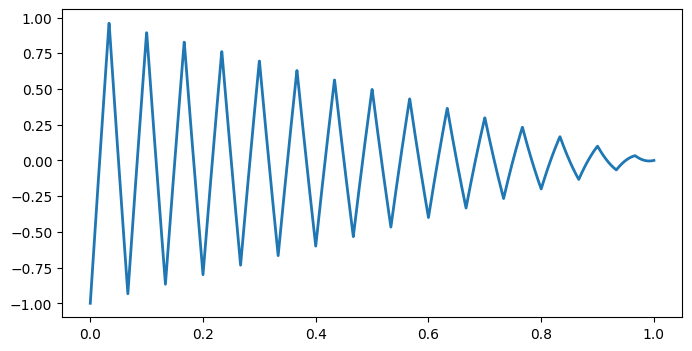

In [6]:
def triangle_wave(t, period=1, amplitude=1, decay = 0.2):
    """
    Generate an isosceles triangular waveform with linear amplitude decay.
    
    Parameters:
    -----------
    t : float or array-like
        Time input (can be scalar or numpy array).
    period : float, optional
        The period of the triangle wave. Default is 1.
    amplitude : float, optional
        The initial amplitude of the wave. Default is 1.
    decay_rate : float, optional
        The rate at which the amplitude linearly decays per unit time. Default is 0.1.
        
    Returns:
    --------
    float or numpy array
        The evaluated triangle wave at time t.
    """

    # Ensure t is a numpy array to handle scalar or array inputs uniformly
    
    t = np.asarray(t)
    decay_rate = decay*(amplitude/np.max(t))

    # Linearly decaying amplitude
    # Use np.clip to avoid negative amplitudes
    amp = np.clip(amplitude - decay_rate * t, 0, None)

    # Compute the triangular shape
    wave = 2 * np.abs(2 * (t / period - np.floor(t / period + 0.5))) - 1

    return amp * wave

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 4096)

wave = triangle_wave(t = 15 * np.pi * x,
                    period = np.pi,
                    amplitude = 1,
                    decay = 1)

plt.figure(figsize=(8, 4))
plt.plot(x, wave, lw=2)


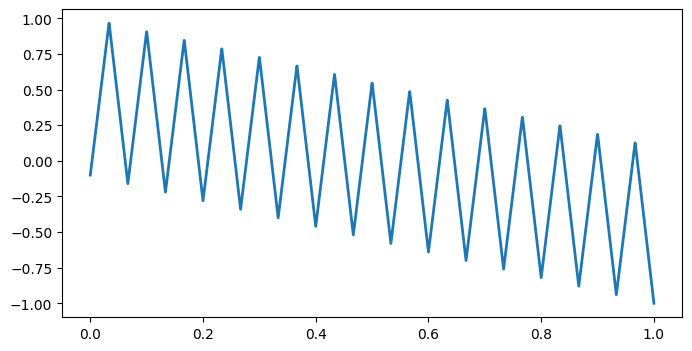

In [12]:

def triangle_wave_tdown(t, period=1, amplitude=1, decay = 1):
    """
    Generate an isosceles triangular waveform with linear amplitude decay.
    
    Parameters:
    -----------
    t : float or array-like
        Time input (can be scalar or numpy array).
    period : float, optional
        The period of the triangle wave. Default is 1.
    amplitude : float, optional
        The initial amplitude of the wave. Default is 1.
    decay_rate : float, optional
        The rate at which the amplitude linearly decays per unit time. Default is 0.1.
        
    Returns:
    --------
    float or numpy array
        The evaluated triangle wave at time t.
    """

    # Ensure t is a numpy array to handle scalar or array inputs uniformly
    
    t = np.asarray(t)
    decay_rate = decay*(amplitude/np.max(t))

    # Linearly decaying amplitude
    # Use np.clip to avoid negative amplitudes
    amp = np.clip(amplitude - decay_rate * t, 0, None)

    # Compute the triangular shape
    wave = 1.1 * np.abs(2 * (t / period - np.floor(t / period + 0.5))) - 1*(1.1/2) + (0.45 - 0.9*(t/np.max(t)))

    return wave

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 4096)

wave = triangle_wave_tdown(t = 15 * np.pi * x,
                    period = np.pi,
                    amplitude = 1,
                    decay = 1)

plt.figure(figsize=(8, 4))
plt.plot(x, wave, lw=2)



In [ ]:
import cv2
import numpy as np


def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    """
    h, w = image.shape[:2]
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def crop_center_square(image):
    """
    Crops the input image to a centered square based on its smallest dimension.
    """
    h, w = image.shape[:2]
    square_size = min(h, w)
    margin_x = (w - square_size) // 2
    margin_y = (h - square_size) // 2
    return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]

def t_static_fix(t):
    if t <= 1.3/1.6:
        return t
    elif t >= 1.3/1.6 and t <= 1.45/1.6:
        return 1.3/1.6 + (t-1.3/1.6)*2
    else:
        return 1 - (t-1.45/1.6)*2
    

# def max_static_alpha(t):
#     """ t is valued from 0 to 1 """
#     factor = 1/(1+np.exp(-10*(t-0.5)))
#     return 1/(1+np.exp(-10*((1/(factor**2))*t-0.9)))

def max_static_alpha(t):
    """ t is valued from 0 to 1 """
    return 0.2

def create_mockup_video(
    image_path,
    output_video_path,
    final_image_path,
    intro_image_path=None,      # NEW: Intro image path (if None, use the base image),           # Number of zoom frames.
    fps=50,
    zoom_duration_frames=200,   # For dynamic zoom
    output_scale=1.0,           # Full square output.
    zoom_intensity=0.2          # Fraction of the full image used in the initial crop.
):
    """
    Creates a square video that begins with a creative hook that smoothly transforms
    an introductory image into the starting zoom frame, then continues with a dynamic zoom,
    a creative 7-second transition, and a final hold.
    
    Parameters:
      - intro_image_path: Path to an image to use in the introductory hook. If not provided,
                          the base image will be used.
      - zoom_intensity: Fraction (0 < zoom_intensity <= 1) representing the size of the 
                        initial crop relative to the full image. A lower value means a 
                        more intense zoom (i.e. starting from a smaller portion of the image).
    """
    import cv2
    import numpy as np

    # A helper function for center cropping.
    def crop_center_square(img):
        h, w = img.shape[:2]
        min_dim = min(w, h)
        start_x = (w - min_dim) // 2
        start_y = (h - min_dim) // 2
        return img[start_y:start_y+min_dim, start_x:start_x+min_dim]
    
    # A helper function for applying a wavy effect.
    # (Assumes you already have one; if not, substitute your implementation.)
    def apply_wave_effect(img, amplitude, frequency, phase):
        # Create a meshgrid of coordinates.
        h, w = img.shape[:2]
        X, Y = np.meshgrid(np.arange(w), np.arange(h))
        # Create a displacement map based on a sine wave.
        displacement = amplitude * np.sin(2 * np.pi * frequency * Y / h + phase)
        # For each x coordinate, shift by displacement (wrap-around via border reflection).
        map_x = (X + displacement).astype(np.float32)
        map_y = np.float32(Y)
        return cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    
    # Optional: a function used in the transition (as in your original code).

    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square(base_img)
    S = base_square.shape[0]  # Side length of the square

    # 1.5. Load and crop the intro image.
    # If no intro_image_path is provided, fall back to base_square.
    if intro_image_path is not None:
        intro_img = cv2.imread(intro_image_path)
        if intro_img is None:
            raise IOError(f"Could not read intro image: {intro_image_path}")
        intro_square = crop_center_square(intro_img)
    else:
        intro_square = base_square.copy()

    # 2. Define the output size.
    out_size = int(S * output_scale)
    out_w = out_h = out_size

    # 3. Set up the video writer using a compressed codec.
    fourcc = cv2.VideoWriter_fourcc(*'avc1')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))

    # 4. Compute the first dynamic zoom frame (zoom_start)
    init_crop_size = zoom_intensity * S
    init_center = (S/2 + 0.1 * S, S/2)
    x0 = int(init_center[0] - init_crop_size/2)
    y0 = int(init_center[1] - init_crop_size/2)
    x1 = int(x0 + init_crop_size)
    y1 = int(y0 + init_crop_size)
    x0 = max(0, x0)
    y0 = max(0, y0)
    x1 = min(S, x1)
    y1 = min(S, y1)
    crop_zoom_start = base_square[y0:y1, x0:x1]
    zoom_start = cv2.resize(crop_zoom_start, (out_w, out_h), interpolation=cv2.INTER_LINEAR)

    # 5. Generate the introductory hook that transitions from the intro image to zoom_start.
    intro_frames = int(3 * fps)
    max_intro_amp = 200  # Maximum amplitude for the wave effect during intro.
    max_intro_angle = 0
    for i in range(intro_frames):
        t = i / (intro_frames - 1)
        amplitude = max_intro_amp 
        phase = (28/8) * np.pi * t
        angle = max_intro_angle * t  # Rotate up to 10 degrees.
        center = (out_w / 2, out_h / 2)
        # First, rotate the intro image.
        rotM = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(
            intro_square,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        # Then apply the wavy effect on the rotated image.
        creative = apply_wave_effect(rotated, amplitude=amplitude, frequency=4, phase=phase)
        # Blend the creative frame with the zoom_start frame.
        hook_frame = cv2.addWeighted(creative, 1 - t, zoom_start, t, 0)
        writer.write(hook_frame)
    
    # 6. Generate dynamic zoom frames using subpixel sampling.
    final_zoom_frame = None
    for frame_idx in range(1, zoom_duration_frames):
        alpha = frame_idx / (zoom_duration_frames - 1)
        current_size = (1 - alpha) * init_crop_size + alpha * S
        current_center_x = (1 - alpha) * init_center[0] + alpha * (S/2)
        current_center_y = (1 - alpha) * init_center[1] + alpha * (S/2)
        
        # Use cv2.getRectSubPix for subpixel-accurate cropping.
        crop_size = int(round(current_size))
        crop_frame = cv2.getRectSubPix(base_square, (crop_size, crop_size), (current_center_x, current_center_y))
        
        frame = cv2.resize(crop_frame, (out_w, out_h), interpolation=cv2.INTER_LINEAR)
        writer.write(frame)
        final_zoom_frame = frame.copy()
    
    # 7. Load and prepare the final image.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read image: {final_image_path}")
    final_square = crop_center_square(final_img)
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # Precompute a coordinate grid for the dynamic alpha map used in the transition.
    w_vals = np.linspace(0, 16 * np.pi, out_w)
    h_vals = np.linspace(0, 16 * np.pi, out_h)
    W_grid, H_grid = np.meshgrid(w_vals, h_vals)
    
    # 8. Create a creative 7-second transition.
    transition_frames = int(4 * fps)
    max_wave_amp = 100
    max_angle = 15
    start_scale = 1.1
    end_scale = 1.0
    
    for i in range(transition_frames):
        t = i / (transition_frames - 1)
        amplitude = max_wave_amp * np.sin(4 * np.pi * t)
        phase = 4 * np.pi * t
        angle = max_angle * t                          
        scale = start_scale - (start_scale - end_scale) * t  
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=4, phase=phase)
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        shifted_frame = creative_frame.copy()
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        alpha_map = np.abs( max_static_alpha(t) * np.sin(1.6*np.pi*t_static_fix(t) - 1.3*np.pi) * 0.25 * ( (2 - (np.cos(W_grid*(1+3*(t-0.5))) + np.sin(H_grid))) + (2 - (np.cos((np.max(W_grid)-W_grid)*(1+3*(t-0.5))) + np.sin(H_grid)))  )) #add it for all other sides! #(2 - (np.cos(W_grid) + np.sin((np.max(H_grid)-H_grid)*(1+3*(t-0.5)))) ) + (2 - (np.cos(W_grid) + np.sin(H_grid*(1+3*(t-0.5))))
        alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        blended = (blended.astype(np.float32) * (1 - alpha_map_3) + 
                   noise.astype(np.float32) * alpha_map_3).astype(np.uint8)
        writer.write(blended)
    
    # 9. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_square)
    
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")

import os



create_mockup_video(
    image_path='/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/good_ones/MockBox_GeneralWall_01_2x3.jpg',   # path to your saved mockup
    output_video_path=os.path.join(os.path.dirname('/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/image_0.jpg'), 'chosen_video.mp4'),  # path to save the video
    final_image_path = '/Users/henryschnieders/Desktop/logo.png',
    intro_image_path = '/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/image_0.jpg'
)

In [5]:
import cv2
import numpy as np


def apply_wave_effect(image, amplitude=5, frequency=4, phase=0, border_mode=cv2.BORDER_REFLECT):
    """
    Applies a horizontal sine-wave distortion to an image using OpenCV’s remap.
    This version may reflect multiple times if the displacement is very high.
    """
    h, w = image.shape[:2]
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=border_mode)
    return distorted


def apply_wave_effect_single_reflect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image but limits the reflection to a single bounce.
    This prevents the effect from stitching together more than two copies (original and one reflection)
    in the same row.
    """
    h, w = image.shape[:2]
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    # Compute displacement as usual.
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    x_new = x_indices + displacement

    # Apply a single reflection mapping:
    # If x_new < 0, reflect it: x_new = -x_new.
    # If x_new > (w-1), reflect it: x_new = 2*(w-1) - x_new.
    x_new = np.where(x_new < 0, -x_new, x_new)
    x_new = np.where(x_new > (w - 1), 2 * (w - 1) - x_new, x_new)
    # Ensure all coordinates fall within valid range.
    x_new = np.clip(x_new, 0, w - 1).astype(np.float32)
    map_y = y_indices.astype(np.float32)

    # Use BORDER_CONSTANT here because our mapping already forces coordinates in range.
    distorted = cv2.remap(image, x_new, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    return distorted


def crop_center_square(image):
    """
    Crops the input image to a centered square based on its smallest dimension.
    """
    h, w = image.shape[:2]
    square_size = min(h, w)
    margin_x = (w - square_size) // 2
    margin_y = (h - square_size) // 2
    return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]


def t_static_fix(t):
    if t <= 1.3/1.6:
        return t
    elif t >= 1.3/1.6 and t <= 1.45/1.6:
        return 1.3/1.6 + (t-1.3/1.6)*2
    else:
        return 1 - (t-1.45/1.6)*2
    

def max_static_alpha(t):
    """ t is valued from 0 to 1 """
    return 0.2


def create_mockup_video(
    image_path,
    output_video_path,
    final_image_path,
    intro_image_path=None,  # If None, use the base image.
    fps=50,
    zoom_duration_frames=200,   # For dynamic zoom.
    output_scale=1.0,           # Full square output.
    zoom_intensity=0.2          # Fraction of the full image used in the initial crop.
):
    """
    Creates a square video that begins with a creative hook that smoothly transforms
    an introductory image into the starting zoom frame, then continues with a dynamic zoom,
    a creative 7-second transition, and a final hold.
    """
    # Helper function for center cropping.
    def crop_center_square_local(img):
        h, w = img.shape[:2]
        min_dim = min(w, h)
        start_x = (w - min_dim) // 2
        start_y = (h - min_dim) // 2
        return img[start_y:start_y+min_dim, start_x:start_x+min_dim]
    
    # Helper function for applying the wavy effect (using the default reflection) if needed.
    def apply_wave_effect_custom(img, amplitude, frequency, phase, border_mode=cv2.BORDER_REFLECT):
        h, w = img.shape[:2]
        X, Y = np.meshgrid(np.arange(w), np.arange(h))
        displacement = amplitude * np.sin(2 * np.pi * frequency * Y / h + phase)
        map_x = (X + displacement).astype(np.float32)
        map_y = np.float32(Y)
        return cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=border_mode)
    
    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square_local(base_img)
    S = base_square.shape[0]  # Side length of the square

    # 1.5. Load and crop the intro image.
    if intro_image_path is not None:
        intro_img = cv2.imread(intro_image_path)
        if intro_img is None:
            raise IOError(f"Could not read intro image: {intro_image_path}")
        intro_square = crop_center_square_local(intro_img)
    else:
        intro_square = base_square.copy()

    # 2. Define the output size.
    out_size = int(S * output_scale)
    out_w = out_h = out_size

    # 3. Set up the video writer using a compressed codec.
    fourcc = cv2.VideoWriter_fourcc(*'avc1')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))

    # 4. Compute the first dynamic zoom frame (zoom_start)
    init_crop_size = zoom_intensity * S
    init_center = (S/2 + 0.1 * S, S/2)
    x0 = int(init_center[0] - init_crop_size/2)
    y0 = int(init_center[1] - init_crop_size/2)
    x1 = int(x0 + init_crop_size)
    y1 = int(y0 + init_crop_size)
    x0 = max(0, x0)
    y0 = max(0, y0)
    x1 = min(S, x1)
    y1 = min(S, y1)
    crop_zoom_start = base_square[y0:y1, x0:x1]
    zoom_start = cv2.resize(crop_zoom_start, (out_w, out_h), interpolation=cv2.INTER_LINEAR)

    # 5. Generate the introductory hook that transitions from the intro image to zoom_start.
    # Use our custom single-reflect wave effect here.
    intro_frames = int(3 * fps)
    max_intro_amp = 200  # Maximum amplitude for the wave effect during intro.
    max_intro_angle = 0  # (Set to 0 here; adjust if you want rotation.)
    for i in range(intro_frames):
        t = i / (intro_frames - 1)
        amplitude = max_intro_amp
        phase = (28/8) * np.pi * t
        angle = max_intro_angle * t  
        center = (out_w / 2, out_h / 2)
        # Rotate the intro image.
        rotM = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(
            intro_square,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        # Apply the wave effect that only reflects once.
        creative = apply_wave_effect_single_reflect(rotated, amplitude=amplitude, frequency=4, phase=phase)
        # Blend the creative frame with the zoom_start frame.
        hook_frame = cv2.addWeighted(creative, 1 - t, zoom_start, t, 0)
        writer.write(hook_frame)
    
    # 6. Generate dynamic zoom frames using subpixel sampling.
    final_zoom_frame = None
    for frame_idx in range(1, zoom_duration_frames):
        alpha = frame_idx / (zoom_duration_frames - 1)
        current_size = (1 - alpha) * init_crop_size + alpha * S
        current_center_x = (1 - alpha) * init_center[0] + alpha * (S/2)
        current_center_y = (1 - alpha) * init_center[1] + alpha * (S/2)
        
        # Use cv2.getRectSubPix for subpixel-accurate cropping.
        crop_size = int(round(current_size))
        crop_frame = cv2.getRectSubPix(base_square, (crop_size, crop_size), (current_center_x, current_center_y))
        
        frame = cv2.resize(crop_frame, (out_w, out_h), interpolation=cv2.INTER_LINEAR)
        writer.write(frame)
        final_zoom_frame = frame.copy()
    
    # 7. Load and prepare the final image.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read image: {final_image_path}")
    final_square = crop_center_square_local(final_img)
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # Precompute a coordinate grid for the dynamic alpha map used in the transition.
    w_vals = np.linspace(0, 16 * np.pi, out_w)
    h_vals = np.linspace(0, 16 * np.pi, out_h)
    W_grid, H_grid = np.meshgrid(w_vals, h_vals)
    
    # 8. Create a creative 7-second transition.
    transition_frames = int(4 * fps)
    max_wave_amp = 100
    max_angle = 15
    start_scale = 1.1
    end_scale = 1.0
    
    for i in range(transition_frames):
        t = i / (transition_frames - 1)
        amplitude = max_wave_amp * np.sin(4 * np.pi * t)
        phase = 4 * np.pi * t
        angle = max_angle * t                          
        scale = start_scale - (start_scale - end_scale) * t  
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=4, phase=phase)
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        shifted_frame = creative_frame.copy()
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        alpha_map = np.abs( max_static_alpha(t) * np.sin(1.6*np.pi*t_static_fix(t) - 1.3*np.pi) * 0.25 * (
            (2 - (np.cos(W_grid*(1+3*(t-0.5))) + np.sin(H_grid))) +
            (2 - (np.cos((np.max(W_grid)-W_grid)*(1+3*(t-0.5))) + np.sin(H_grid)))
        ))
        alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        blended = (blended.astype(np.float32) * (1 - alpha_map_3) + 
                   noise.astype(np.float32) * alpha_map_3).astype(np.uint8)
        writer.write(blended)
    
    # 9. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_square)
    
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")


import os

create_mockup_video(
    image_path='/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/good_ones/MockBox_GeneralWall_01_2x3.jpg',
    output_video_path=os.path.join(os.path.dirname('/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/image_0.jpg'), 'chosen_video.mp4'),
    final_image_path='/Users/henryschnieders/Desktop/logo.png',
    intro_image_path='/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/image_0.jpg'
)


[INFO] Video saved to /Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/chosen_video.mp4


In [2]:
import cv2
import numpy as np



# def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
#     """
#     Applies a horizontal sine-wave distortion to an image.
    
#     :param image: Input image.
#     :param amplitude: Maximum pixel displacement.
#     :param frequency: Number of sine cycles over the image height.
#     :param phase: Phase shift for the sine wave.
#     :return: Distorted image.
#     """
#     h, w = image.shape[:2]
#     # Create a meshgrid of (x, y) coordinates.
#     x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
#     # Compute horizontal displacement based on a sine wave along the y axis.
#     displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
#     # Build mapping arrays for remap (must be float32).
#     map_x = (x_indices + displacement).astype(np.float32)
#     map_y = y_indices.astype(np.float32)
#     # Remap the image using the computed displacement.
#     distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
#                           borderMode=cv2.BORDER_REFLECT)
#     return distorted

# def crop_center_square(image):
#     """
#     Crops the input image to a centered square based on its smallest dimension.
    
#     :param image: Input image.
#     :return: Square-cropped image.
#     """
#     h, w = image.shape[:2]
#     square_size = min(h, w)
#     margin_x = (w - square_size) // 2
#     margin_y = (h - square_size) // 2
#     return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]


# def max_static_alpha(t):
#     """ t is valued from 0 to 1

#     Args:
#         t (_type_): _description_
#     """
#     factor = 1/(1+np.exp(-10*(t-0.5)))

#     return 1/(1+np.exp(-10*((1/factor)*t-0.9)))

# def create_mockup_video(
#     image_path,
#     output_video_path,
#     final_image_path,
#     total_frames=500,   # Number of zoom frames.
#     fps=50,
#     zoom_duration_frames=200,  # For dynamic zoom
#     output_scale=1.0  # We will output the full square (so set to 1.0)
# ):
#     """
#     Creates a square video that starts with a dynamic zoom from a square crop
#     of a base image and then transitions into a final image (also square cropped)
#     with an abstract, tech-y effect.
    
#     The video structure is:
#       - Dynamic Zoom frames (from an initial offset crop to the full square)
#       - A creative 7-second transition (with wave distortion, rotation, scaling, color shift,
#         and a dynamic static overlay).
#       - A 1-second hold of the final image.
    
#     :param image_path: Path to the base image.
#     :param final_image_path: Path to the final image.
#     :param output_video_path: Path to save the .mp4 video.
#     :param total_frames: Number of frames for the zoom sequence.
#     :param fps: Frames per second.
#     :param zoom_duration_frames: Number of frames for the dynamic zoom.
#     :param output_scale: Scale factor for output relative to the base square crop (1.0 = full square).
#     """
#     # 1. Load and crop the base image to a square.
#     base_img = cv2.imread(image_path)
#     if base_img is None:
#         raise IOError(f"Could not read image: {image_path}")
#     base_square = crop_center_square(base_img)
#     S = base_square.shape[0]  # Base square side length
    
#     # 2. Define the output size. We want a square video.
#     out_size = int(S * output_scale)  # Here output_scale=1.0 means full resolution of the square crop.
#     out_w = out_h = out_size

#     # 3. Set up the video writer.
#     fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#     writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))
    
#     # 4. Generate dynamic zoom frames.
#     # Define initial crop parameters:
#     # Initial crop size is 60% of S.
#     init_crop_size = 0.6 * S
#     # Initial crop center is shifted to the right by 10% of S.
#     init_center = (S/2 + 0.1 * S, S/2)
#     # Final crop: full square with center at (S/2, S/2) and size S.
#     final_crop_size = S
#     final_center = (S/2, S/2)
    
#     for frame_idx in range(zoom_duration_frames):
#         alpha = frame_idx / (zoom_duration_frames - 1)  # Goes from 0 to 1.
#         # Interpolate crop size and center.
#         current_size = (1 - alpha) * init_crop_size + alpha * final_crop_size
#         current_center_x = (1 - alpha) * init_center[0] + alpha * final_center[0]
#         current_center_y = (1 - alpha) * init_center[1] + alpha * final_center[1]
#         # Calculate crop rectangle (make sure coordinates are integers).
#         x0 = int(current_center_x - current_size/2)
#         y0 = int(current_center_y - current_size/2)
#         x1 = int(x0 + current_size)
#         y1 = int(y0 + current_size)
#         # Ensure the crop rectangle is within base_square boundaries.
#         x0 = max(0, x0)
#         y0 = max(0, y0)
#         x1 = min(S, x1)
#         y1 = min(S, y1)
#         # Crop and resize to output size.
#         crop_frame = base_square[y0:y1, x0:x1]
#         frame = cv2.resize(crop_frame, (out_w, out_h), interpolation=cv2.INTER_LINEAR)
#         writer.write(frame)
#         final_zoom_frame = frame.copy()  # Save the last zoom frame.

#     # 5. Load, crop, and resize the final image.
#     final_img = cv2.imread(final_image_path)
#     if final_img is None:
#         raise IOError(f"Could not read final image: {final_image_path}")
#     final_square = crop_center_square(final_img)
#     final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

#     # Precompute a coordinate grid for the dynamic alpha map (values 0 to 16*pi).
#     w_vals = np.linspace(0, 16 * np.pi, out_w)
#     h_vals = np.linspace(0, 16 * np.pi, out_h)
#     W_grid, H_grid = np.meshgrid(w_vals, h_vals)
    
#     # 6. Create a creative 7-second transition.
#     transition_frames = int(3 * fps)
#     max_wave_amp = 30   # Maximum wave amplitude in pixels.
#     max_angle = 15      # Maximum rotation (degrees) at the end of the transition.
#     start_scale = 1.1   # Start with a slight zoom.
#     end_scale = 1.0     # End at normal scale.

    
#     for i in range(transition_frames):
#         t = i / (transition_frames - 1)  # t moves from 0 to 1.
#         # Calculate creative parameters.
#         amplitude = max_wave_amp * np.sin(9*np.pi * t)  # Peaks mid-transition.
#         phase = 4 * np.pi * t                           # Evolving phase.
#         # Smooth rotation starting at 0 degrees and gradually increasing.
#         angle = max_angle * t                          
#         scale = start_scale - (start_scale - end_scale) * t  # Scale from start_scale to 1.0.
        
#         # (a) Apply a sine-wave distortion to the final zoom frame.
#         creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=6, phase=phase)
        
#         # (b) Apply rotation and scaling.
#         center = (out_w / 2, out_h / 2)
#         rotM = cv2.getRotationMatrix2D(center, angle, scale)
#         creative_frame = cv2.warpAffine(
#             creative_frame,
#             rotM,
#             (out_w, out_h),
#             flags=cv2.INTER_LINEAR,
#             borderMode=cv2.BORDER_REFLECT
#         )
        
#         # (c) Apply a slight color shift for extra tech-y flair.
#         shifted_frame = creative_frame.copy()
#         shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        
#         # (d) Blend the creatively transformed frame with the final image.
#         blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        
#         # (e) Generate a noise layer (static).
#         noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        
#         # (f) Create a dynamic per-pixel alpha map for the static overlay.
#         # Formula: max_static_alpha*sin(t)*0.25*(2 - (cos(w) + sin(h)))
#         alpha_map = np.abs( max_static_alpha(t) * np.sin(1.6*np.pi*t-1.3*np.pi) * 0.25 * (2 - (np.cos(W_grid) + np.sin(H_grid))) )
#         # Expand alpha_map to 3 channels.
#         alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        
#         # Blend the noise with the current blended frame using the dynamic alpha map.
#         blended = (blended.astype(np.float32) * (1 - alpha_map_3) + 
#                    noise.astype(np.float32) * alpha_map_3).astype(np.uint8)
        
#         writer.write(blended)
    
#     # 7. Hold the final image on screen for 1 second.
#     final_hold_frames = int(1 * fps)
#     for i in range(final_hold_frames):
#         writer.write(final_square)
    
#     # 8. Cleanup: release the video writer.
#     writer.release()
#     print(f"[INFO] Video saved to {output_video_path}")

# # Optional helper: compress/convert video to a 1080x1080 square using FFmpeg.
# def compress_to_1080_square_video(input_path, crf=23, preset='medium', audio_bitrate='128k'):
#     """
#     Crops/resizes a local video to 1080x1080 using FFmpeg, saving it as <filename>_1080_square.mp4.
#     """
#     output_path = os.path.splitext(input_path)[0] + "_1080_square.mp4"
#     filter_string = (
#         "crop=min(iw\\,ih):min(iw\\,ih):"
#         "(iw - min(iw\\,ih))/2:(ih - min(iw\\,ih))/2,"
#         "scale=1080:1080"
#     )
#     cmd = [
#         "ffmpeg", "-y",
#         "-i", input_path,
#         "-vf", filter_string,
#         "-c:v", "libx264",
#         "-crf", str(crf),
#         "-preset", preset,
#         "-c:a", "aac",
#         "-b:a", audio_bitrate,
#         output_path
#     ]
#     subprocess.run(cmd, check=True)
#     return output_path


def apply_wave_effect(image, amplitude=5, frequency=4, phase=0):
    """
    Applies a horizontal sine-wave distortion to an image.
    """
    h, w = image.shape[:2]
    x_indices, y_indices = np.meshgrid(np.arange(w), np.arange(h))
    displacement = amplitude * np.sin(2 * np.pi * frequency * y_indices / h + phase)
    map_x = (x_indices + displacement).astype(np.float32)
    map_y = y_indices.astype(np.float32)
    distorted = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, 
                          borderMode=cv2.BORDER_REFLECT)
    return distorted

def crop_center_square(image):
    """
    Crops the input image to a centered square based on its smallest dimension.
    """
    h, w = image.shape[:2]
    square_size = min(h, w)
    margin_x = (w - square_size) // 2
    margin_y = (h - square_size) // 2
    return image[margin_y:margin_y+square_size, margin_x:margin_x+square_size]

def t_static_fix(t):
    if t <= 1.3/1.6:
        return t
    elif t >= 1.3/1.6 and t <= 1.45/1.6:
        return 1.3/1.6 + (t-1.3/1.6)*2
    else:
        return 1 - (t-1.45/1.6)*2
    

# def max_static_alpha(t):
#     """ t is valued from 0 to 1 """
#     factor = 1/(1+np.exp(-10*(t-0.5)))
#     return 1/(1+np.exp(-10*((1/(factor**2))*t-0.9)))

def max_static_alpha(t):
    """ t is valued from 0 to 1 """
    return 0.4

def create_mockup_video(
    image_path,
    output_video_path,
    final_image_path,
    intro_image_path=None,      # NEW: Intro image path (if None, use the base image),           # Number of zoom frames.
    fps=50,
    zoom_duration_frames=200,   # For dynamic zoom
    output_scale=1.0,           # Full square output.
    zoom_intensity=0.2          # Fraction of the full image used in the initial crop.
):
    """
    Creates a square video that begins with a creative hook that smoothly transforms
    an introductory image into the starting zoom frame, then continues with a dynamic zoom,
    a creative 7-second transition, and a final hold.
    
    Parameters:
      - intro_image_path: Path to an image to use in the introductory hook. If not provided,
                          the base image will be used.
      - zoom_intensity: Fraction (0 < zoom_intensity <= 1) representing the size of the 
                        initial crop relative to the full image. A lower value means a 
                        more intense zoom (i.e. starting from a smaller portion of the image).
    """
    import cv2
    import numpy as np

    # A helper function for center cropping.
    def crop_center_square(img):
        h, w = img.shape[:2]
        min_dim = min(w, h)
        start_x = (w - min_dim) // 2
        start_y = (h - min_dim) // 2
        return img[start_y:start_y+min_dim, start_x:start_x+min_dim]
    
    # A helper function for applying a wavy effect.
    # (Assumes you already have one; if not, substitute your implementation.)
    def apply_wave_effect(img, amplitude, frequency, phase):
        # Create a meshgrid of coordinates.
        h, w = img.shape[:2]
        X, Y = np.meshgrid(np.arange(w), np.arange(h))
        # Create a displacement map based on a sine wave.
        displacement = amplitude * np.sin(2 * np.pi * frequency * Y / h + phase)
        # For each x coordinate, shift by displacement (wrap-around via border reflection).
        map_x = (X + displacement).astype(np.float32)
        map_y = np.float32(Y)
        return cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    
    # Optional: a function used in the transition (as in your original code).

    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square(base_img)
    S = base_square.shape[0]  # Side length of the square

    # 1.5. Load and crop the intro image.
    # If no intro_image_path is provided, fall back to base_square.
    if intro_image_path is not None:
        intro_img = cv2.imread(intro_image_path)
        if intro_img is None:
            raise IOError(f"Could not read intro image: {intro_image_path}")
        intro_square = crop_center_square(intro_img)
    else:
        intro_square = base_square.copy()

    # 2. Define the output size.
    out_size = int(S * output_scale)
    out_w = out_h = out_size

    # 3. Set up the video writer using a compressed codec.
    fourcc = cv2.VideoWriter_fourcc(*'avc1')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))

    # 4. Compute the first dynamic zoom frame (zoom_start)
    init_crop_size = zoom_intensity * S
    init_center = (S/2 + 0.1 * S, S/2)
    x0 = int(init_center[0] - init_crop_size/2)
    y0 = int(init_center[1] - init_crop_size/2)
    x1 = int(x0 + init_crop_size)
    y1 = int(y0 + init_crop_size)
    x0 = max(0, x0)
    y0 = max(0, y0)
    x1 = min(S, x1)
    y1 = min(S, y1)
    crop_zoom_start = base_square[y0:y1, x0:x1]
    zoom_start = cv2.resize(crop_zoom_start, (out_w, out_h), interpolation=cv2.INTER_LINEAR)

    # 5. Generate the introductory hook that transitions from the intro image to zoom_start.
    intro_frames = int(3 * fps)
    max_intro_amp = 400  # Maximum amplitude for the wave effect during intro.
    max_intro_angle = 0
    for i in range(intro_frames):
        t = i / (intro_frames - 1)
        amplitude = max_intro_amp 
        phase = (28/4) * np.pi * t
        angle = max_intro_angle * t  # Rotate up to 10 degrees.

        intro_square = crop_center_square(intro_img)
        intro_square = cv2.resize(intro_square, (out_w, out_h), interpolation=cv2.INTER_AREA)
        
        center = (out_w / 2, out_h / 2)
        # First, rotate the intro image.
        rotM = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(
            intro_square,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        # Then apply the wavy effect on the rotated image.
        creative = apply_wave_effect(rotated, amplitude=amplitude, frequency=4, phase=phase)
        # Blend the creative frame with the zoom_start frame.
        hook_frame = cv2.addWeighted(creative, 1 - t, zoom_start, t, 0)
        writer.write(hook_frame)
    
    # 6. Generate dynamic zoom frames using subpixel sampling.
    final_zoom_frame = None
    for frame_idx in range(1, zoom_duration_frames):
        alpha = frame_idx / (zoom_duration_frames - 1)
        current_size = (1 - alpha) * init_crop_size + alpha * S
        current_center_x = (1 - alpha) * init_center[0] + alpha * (S/2)
        current_center_y = (1 - alpha) * init_center[1] + alpha * (S/2)
        
        # Use cv2.getRectSubPix for subpixel-accurate cropping.
        crop_size = int(round(current_size))
        crop_frame = cv2.getRectSubPix(base_square, (crop_size, crop_size), (current_center_x, current_center_y))
        
        frame = cv2.resize(crop_frame, (out_w, out_h), interpolation=cv2.INTER_LINEAR)
        writer.write(frame)
        final_zoom_frame = frame.copy()
    
    # 7. Load and prepare the final image.
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read image: {final_image_path}")
    final_square = crop_center_square(final_img)
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # Precompute a coordinate grid for the dynamic alpha map used in the transition.
    w_vals = np.linspace(0, 16 * np.pi, out_w)
    h_vals = np.linspace(0, 16 * np.pi, out_h)
    W_grid, H_grid = np.meshgrid(w_vals, h_vals)
    
    # 8. Create a creative 7-second transition.
    transition_frames = int(4 * fps)
    max_wave_amp = 100
    max_angle = 15
    start_scale = 1.1
    end_scale = 1.0
    
    for i in range(transition_frames):
        t = i / (transition_frames - 1)
        amplitude = max_wave_amp * np.sin(4 * np.pi * t)
        phase = 4 * np.pi * t
        angle = max_angle * t                          
        scale = start_scale - (start_scale - end_scale) * t  
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude=amplitude, frequency=4, phase=phase)
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(
            creative_frame,
            rotM,
            (out_w, out_h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REFLECT
        )
        shifted_frame = creative_frame.copy()
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        alpha_map = np.abs( max_static_alpha(t) * np.sin(1.6*np.pi*t_static_fix(t) - 1.3*np.pi) * 0.25 * ( (2 - (np.cos(W_grid*(1+3*(t-0.5))) + np.sin(H_grid))) + (2 - (np.cos((np.max(W_grid)-W_grid)*(1+3*(t-0.5))) + np.sin(H_grid)))) ) #add it for all other sides!
        alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        blended = (blended.astype(np.float32) * (1 - alpha_map_3) + 
                   noise.astype(np.float32) * alpha_map_3).astype(np.uint8)
        
        writer.write(blended)
    
    # 9. Hold the final image on screen for 1 second.
    final_hold_frames = int(1 * fps)
    for i in range(final_hold_frames):
        writer.write(final_square)
    
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")


import os

create_mockup_video(
    image_path='/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/good_ones/MockBox_GeneralWall_01_2x3.jpg',
    output_video_path=os.path.join(os.path.dirname('/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/image_0.jpg'), 'chosen_video.mp4'),
    final_image_path='/Users/henryschnieders/Desktop/logo.png',
    intro_image_path='/Users/henryschnieders/Documents/ScriptedStyles/Designs/Releases/Next_release/Heatmap/images/heart111111.jpg'
)




# create_mockup_video(image_path = '/Users/henryschnieders/Desktop/placed_art.jpg',
#                     output_video_path = '/Users/henryschnieders/Desktop/binary_cool111111_1080_square.mp4',
#                     final_image_path = '/Users/henryschnieders/Desktop/logo.png')


# Example usage:

# base_image = '/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/mockup0.jpg'
# final_image = '/Users/henryschnieders/Desktop/logo.png'  # Final image path.
# output_video = '/Users/henryschnieders/Desktop/mockup0_afterdone.mp4'

# create_mockup_video(
#     image_path=base_image,
#     final_image_path=final_image,
#     output_video_path=output_video,
#     total_frames=200,          # Total frames for zoom sequence.
#     fps=30,
#     zoom_duration_frames=200,  # Dynamic zoom duration.
#     output_scale=1.0           # Full square output.
# )

    # Optionally, compress the video to a 1080x1080 square.
    # compressed_video = compress_to_1080_square_video(output_video)
    # print(f"[INFO] Compressed video saved to {compressed_video}")



[INFO] Video saved to /Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/chosen_video.mp4


In [4]:
def max_static_alpha(t):
    """ t is valued from 0 to 1 """
    return 0.4

def t_static_fix(t):
    if t <= 1.3/1.6:
        return t
    elif t >= 1.3/1.6 and t <= 1.45/1.6:
        return 1.3/1.6 + (t-1.3/1.6)*2
    else:
        return 1 - (t-1.45/1.6)*2

def create_mockup_video(
    image_path,
    output_video_path,
    final_image_path,
    intro_image_path=None,
    fps=50,
    zoom_duration_frames=200,
    output_scale=1.0,
    zoom_intensity=0.2
):
    """
    Creates a square video that begins with a creative hook (intro image -> zoom),
    continues with a dynamic zoom, a 4-second transition with wavy + static effect,
    then adds 100 frames of the same static effect, and finally holds the final image
    on screen for 1 second.
    """
    import cv2
    import numpy as np

    # A helper function for center cropping.
    def crop_center_square(img):
        h, w = img.shape[:2]
        min_dim = min(w, h)
        start_x = (w - min_dim) // 2
        start_y = (h - min_dim) // 2
        return img[start_y:start_y+min_dim, start_x:start_x+min_dim]
    
    # A helper function for applying a wavy effect.
    def apply_wave_effect(img, amplitude, frequency, phase):
        h, w = img.shape[:2]
        X, Y = np.meshgrid(np.arange(w), np.arange(h))
        displacement = amplitude * np.sin(2 * np.pi * frequency * Y / h + phase)
        map_x = (X + displacement).astype(np.float32)
        map_y = Y.astype(np.float32)
        return cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    
    # 1. Load and crop the base image to a square.
    base_img = cv2.imread(image_path)
    if base_img is None:
        raise IOError(f"Could not read image: {image_path}")
    base_square = crop_center_square(base_img)
    S = base_square.shape[0]  # side length of the square

    # 1.5. Load/prepare the intro image (or fall back to base).
    if intro_image_path is not None:
        intro_img = cv2.imread(intro_image_path)
        if intro_img is None:
            raise IOError(f"Could not read intro image: {intro_image_path}")
        intro_square = crop_center_square(intro_img)
    else:
        intro_square = base_square.copy()

    # 2. Define the output size.
    out_size = int(S * output_scale)
    out_w = out_h = out_size

    # 3. Set up the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'avc1')
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (out_w, out_h))

    # 4. Compute the first dynamic zoom frame (zoom_start).
    init_crop_size = zoom_intensity * S
    init_center = (S/2 + 0.1 * S, S/2)
    x0 = int(init_center[0] - init_crop_size/2)
    y0 = int(init_center[1] - init_crop_size/2)
    x1 = int(x0 + init_crop_size)
    y1 = int(y0 + init_crop_size)
    x0 = max(0, x0)
    y0 = max(0, y0)
    x1 = min(S, x1)
    y1 = min(S, y1)
    crop_zoom_start = base_square[y0:y1, x0:x1]
    zoom_start = cv2.resize(crop_zoom_start, (out_w, out_h), interpolation=cv2.INTER_LINEAR)

    # 5. Generate the intro hook (3s) from intro_square -> zoom_start.
    intro_frames = int(3 * fps)
    max_intro_amp = 400  # wave effect amplitude
    max_intro_angle = 0

    # Resize the intro image once upfront to match output dims,
    # so rotation centers match actual (out_w/2, out_h/2).
    intro_square = cv2.resize(intro_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    for i in range(intro_frames):
        t = i / (intro_frames - 1)
        amplitude = max_intro_amp 
        phase = (28/4) * np.pi * t
        angle = max_intro_angle * t
        
        # Rotate the (already resized) intro image.
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(intro_square, rotM, (out_w, out_h),
                                 flags=cv2.INTER_LINEAR,
                                 borderMode=cv2.BORDER_REFLECT)
        # Wavy effect.
        creative = apply_wave_effect(rotated, amplitude=amplitude, frequency=4, phase=phase)
        # Blend with zoom_start.
        hook_frame = cv2.addWeighted(creative, 1 - t, zoom_start, t, 0)
        writer.write(hook_frame)
    
    # 6. Dynamic zoom frames.
    final_zoom_frame = None
    for frame_idx in range(1, zoom_duration_frames):
        alpha = frame_idx / (zoom_duration_frames - 1)
        current_size = (1 - alpha) * init_crop_size + alpha * S
        current_center_x = (1 - alpha) * init_center[0] + alpha * (S/2)
        current_center_y = (1 - alpha) * init_center[1] + alpha * (S/2)
        
        # Subpixel crop.
        crop_size = int(round(current_size))
        crop_frame = cv2.getRectSubPix(base_square,
                                       (crop_size, crop_size),
                                       (current_center_x, current_center_y))
        frame = cv2.resize(crop_frame, (out_w, out_h), interpolation=cv2.INTER_LINEAR)
        writer.write(frame)
        final_zoom_frame = frame.copy()
    
    # 7. Load and prepare the final image (square, then resize).
    final_img = cv2.imread(final_image_path)
    if final_img is None:
        raise IOError(f"Could not read image: {final_image_path}")
    final_square = crop_center_square(final_img)
    final_square = cv2.resize(final_square, (out_w, out_h), interpolation=cv2.INTER_AREA)

    # For the "dynamic alpha map" approach, precompute a coordinate grid.
    w_vals = np.linspace(0, 16 * np.pi, out_w)
    h_vals = np.linspace(0, 16 * np.pi, out_h)
    W_grid, H_grid = np.meshgrid(w_vals, h_vals)
    
    # 8. Create a 4-second transition from final_zoom_frame -> final_square
    transition_frames = int(4 * fps)
    max_wave_amp = 100
    max_angle = 15
    start_scale = 1.1
    end_scale = 1.0
    
    for i in range(transition_frames):
        t = i / (transition_frames - 1)
        amplitude = max_wave_amp * np.sin(4 * np.pi * t)
        phase = 4 * np.pi * t
        angle = max_angle * t
        scale = start_scale - (start_scale - end_scale) * t
        
        # Wavy transform of final_zoom_frame
        creative_frame = apply_wave_effect(final_zoom_frame, amplitude, frequency=4, phase=phase)
        
        # Rotate/scale about the center
        center = (out_w / 2, out_h / 2)
        rotM = cv2.getRotationMatrix2D(center, angle, scale)
        creative_frame = cv2.warpAffine(creative_frame, rotM, (out_w, out_h),
                                        flags=cv2.INTER_LINEAR,
                                        borderMode=cv2.BORDER_REFLECT)
        
        # Slight color shift
        shifted_frame = creative_frame.copy()
        shifted_frame[..., 0] = cv2.add(shifted_frame[..., 0], int(20 * (1 - t)))
        
        # Blend with final_square
        blended = cv2.addWeighted(shifted_frame, 1 - t, final_square, t, 0)
        
        # Add static/noise with alpha_map
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        alpha_map = np.abs(
            max_static_alpha(t)
            * np.sin(1.6*np.pi*t_static_fix(t) - 1.3*np.pi)
            * 0.25
            * (
                (2 - (np.cos(W_grid*(1+3*(t-0.5))) + np.sin(H_grid)))
                + (2 - (np.cos((np.max(W_grid)-W_grid)*(1+3*(t-0.5))) + np.sin(H_grid)))
            )
        )
        alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        blended = (blended.astype(np.float32)*(1 - alpha_map_3)
                   + noise.astype(np.float32)*alpha_map_3).astype(np.uint8)
        
        writer.write(blended)
    
    # 9. Additional static effect frames (100 frames) over final_square
    #    using the same alpha_map + noise approach.
    static_frames = 100
    for i in range(static_frames):
        # Sweep t in [0..1] again (or set t=1.0 for a 'constant' effect).
        t = i / (static_frames - 1)
        
        # Base is just final_square
        base = final_square.copy()
        
        noise = np.random.randint(0, 256, (out_h, out_w, 3), dtype=np.uint8)
        alpha_map = np.abs(
            max_static_alpha(t)
            * np.sin(1.6*np.pi*t_static_fix(t) - 1.3*np.pi)
            * 0.25
            * (
                (2 - (np.cos(W_grid*(1+3*(t-0.5))) + np.sin(H_grid)))
                + (2 - (np.cos((np.max(W_grid)-W_grid)*(1+3*(t-0.5))) + np.sin(H_grid)))
            )
        )
        alpha_map_3 = np.repeat(alpha_map[:, :, np.newaxis], 3, axis=2)
        
        static_frame = (base.astype(np.float32)*(1 - alpha_map_3)
                        + noise.astype(np.float32)*alpha_map_3).astype(np.uint8)
        
        writer.write(static_frame)

    # 10. Finally, hold the final image for 1 second
    final_hold_frames = int(1 * fps)
    for _ in range(final_hold_frames):
        writer.write(final_square)
    
    writer.release()
    print(f"[INFO] Video saved to {output_video_path}")



import os

create_mockup_video(
    image_path='/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/good_ones/MockBox_GeneralWall_01_2x3.jpg',
    output_video_path=os.path.join(os.path.dirname('/Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/image_0.jpg'), 'chosen_video.mp4'),
    final_image_path='/Users/henryschnieders/Desktop/logo.png',
    intro_image_path='/Users/henryschnieders/Documents/ScriptedStyles/Designs/Releases/Next_release/Heatmap/images/heart111111.jpg'
)

[INFO] Video saved to /Users/henryschnieders/Documents/ScriptedStyles/Automation/Mockup_Generation/tmp/chosen_video.mp4
